## Import libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
import seaborn as sns
from IPython.display import display
import random
import math
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from helper_functions import show_images, do_pca, scree_plot, plot_component
from sklearn.cluster import KMeans
import missingno as msno
import seaborn as sns
sns.set(font_scale = 2)
%matplotlib inline

/home/rohit/anaconda3/envs/EEG/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Index:

1. Exploratory data analysis
    - [Load data](#load)
    - [overview](#overview)
    - [inspection of numerical features](#num_features)
    - [inspecting the datatype of each column](#datatype)
    - [inspecting missing values](#inspect_missing_vals)
    - [handling missing values](#missingvals)
    - [handling categorical features and other features](#cat_features)
    - [feature transformation](#feattrans)
    - [Some insights about the features(Counterplots, box plots and ratio plots)](#insights)
2. How would you segment customers based on their risk (of default)
    - [Explaination](#explain)
    - [PCA](#pca)
    - [interpretation of the feastures](#interpretationpca)
    - [Clustering](#cluster)
3. Which of the clusters would you approve?
    - [Explaination](#clusterexplain)
    - [verdict](#verdict)

## Load dataset
<a id='load'></a>

In [2]:
# Load in the general demographics data.
base_path = './data'
applicant = pd.read_csv(os.path.join(base_path, "applicant.csv"),sep=",")

# Load in the feature summary file.
loan = pd.read_csv(os.path.join(base_path, "loan.csv"), sep=",")


## Overview of data
<a id='overview'></a>

In [3]:
applicant.head()

applicant_id  Primary_applicant_age_in_years  Gender  \
0       1469590                              67    male   
1       1203873                              22  female   
2       1432761                              49    male   
3       1207582                              45    male   
4       1674436                              53    male   

               Marital_status  Number_of_dependents   Housing  \
0                      single                     1       own   
1  divorced/separated/married                     1       own   
2                      single                     2       own   
3                      single                     2  for free   
4                      single                     2  for free   

   Years_at_current_residence            Employment_status  \
0                           4  skilled employee / official   
1                           2  skilled employee / official   
2                           3         unskilled - resident   
3                           4  skilled employee / official   
4                           4  skilled employee / official   

  Has_been_employed_for_at_least Has_been_employed_for_at_most  \
0                        7 years                           NaN   
1                         1 year                       4 years   
2                        4 years                       7 years   
3                        4 years                       7 years   
4                         1 year                       4 years   

                               Telephone  Foreign_worker  \
0  Registered under the applicant's name               1   
1                                    NaN               1   
2                                    NaN               1   
3                                    NaN               1   
4                                    NaN               1   

  Savings_account_balance  \
0                     NaN   
1                     Low   
2                     Low   
3                     Low   
4                     Low   

  Balance_in_existing_bank_account_(lower_limit_of_bucket)  \
0                                                NaN         
1                                                  0         
2                                                NaN         
3                                                NaN         
4                                                NaN         

  Balance_in_existing_bank_account_(upper_limit_of_bucket)  
0                                                  0        
1                                              2 lac        
2                                                NaN        
3                                                  0        
4                                                  0

In [4]:
loan.head()

loan_application_id  applicant_id  Months_loan_taken_for  \
0  d68d975e-edad-11ea-8761-1d6f9c1ff461       1469590                      6   
1  d68d989e-edad-11ea-b1d5-2bcf65006448       1203873                     48   
2  d68d995c-edad-11ea-814a-1b6716782575       1432761                     12   
3  d68d99fc-edad-11ea-8841-17e8848060ae       1207582                     42   
4  d68d9a92-edad-11ea-9f3d-1f8682db006a       1674436                     24   

                Purpose  Principal_loan_amount  \
0  electronic equipment                1169000   
1  electronic equipment                5951000   
2             education                2096000   
3                  FF&E                7882000   
4           new vehicle                4870000   

   EMI_rate_in_percentage_of_disposable_income  \
0                                            4   
1                                            2   
2                                            2   
3                                            2   
4                                            3   

                                            Property  Has_coapplicant  \
0                                        real estate                0   
1                                        real estate                0   
2                                        real estate                0   
3  building society savings agreement/life insurance                0   
4                                                NaN                0   

   Has_guarantor Other_EMI_plans  Number_of_existing_loans_at_this_bank  \
0              0             NaN                                      2   
1              0             NaN                                      1   
2              0             NaN                                      1   
3              1             NaN                                      1   
4              0             NaN                                      2   

                             Loan_history  high_risk_applicant  
0   critical/pending loans at other banks                    0  
1  existing loans paid back duly till now                    1  
2   critical/pending loans at other banks                    0  
3  existing loans paid back duly till now                    0  
4   delay in paying off loans in the past                    1

## Exploring the numberical features
<a id='num_features'></a>

- This does not say much about anyone of the numerical features but its good to do a manual survey of the features to get an idea of what features might seem correlated to the target variable. 
- Just helps build an intiution about the datset.
- Example, 'Primary_applicant_age_in_years', 'Number_of_dependents' and many more seem to be highly correlated to the target variable just by looking at them.

In [5]:
print("applicant.csv")
display(applicant.describe())
print("loan.csv")
display(loan.describe())

applicant.csv


applicant_id  Primary_applicant_age_in_years  Number_of_dependents  \
count  1.000000e+03                     1000.000000           1000.000000   
mean   1.514763e+06                       35.546000              1.155000   
std    2.286764e+05                       11.375469              0.362086   
min    1.105364e+06                       19.000000              1.000000   
25%    1.321398e+06                       27.000000              1.000000   
50%    1.529114e+06                       33.000000              1.000000   
75%    1.707752e+06                       42.000000              1.000000   
max    1.903505e+06                       75.000000              2.000000   

       Years_at_current_residence  Foreign_worker  
count                 1000.000000     1000.000000  
mean                     2.845000        0.963000  
std                      1.103718        0.188856  
min                      1.000000        0.000000  
25%                      2.000000        1.000000  
50%                      3.000000        1.000000  
75%                      4.000000        1.000000  
max                      4.000000        1.000000

loan.csv


applicant_id  Months_loan_taken_for  Principal_loan_amount  \
count  1.000000e+03            1000.000000           1.000000e+03   
mean   1.514763e+06              20.903000           3.271258e+06   
std    2.286764e+05              12.058814           2.822737e+06   
min    1.105364e+06               4.000000           2.500000e+05   
25%    1.321398e+06              12.000000           1.365500e+06   
50%    1.529114e+06              18.000000           2.319500e+06   
75%    1.707752e+06              24.000000           3.972250e+06   
max    1.903505e+06              72.000000           1.842400e+07   

       EMI_rate_in_percentage_of_disposable_income  Has_coapplicant  \
count                                  1000.000000      1000.000000   
mean                                      2.973000         0.041000   
std                                       1.118715         0.198389   
min                                       1.000000         0.000000   
25%                                       2.000000         0.000000   
50%                                       3.000000         0.000000   
75%                                       4.000000         0.000000   
max                                       4.000000         1.000000   

       Has_guarantor  Number_of_existing_loans_at_this_bank  \
count    1000.000000                            1000.000000   
mean        0.052000                               1.407000   
std         0.222138                               0.577654   
min         0.000000                               1.000000   
25%         0.000000                               1.000000   
50%         0.000000                               1.000000   
75%         0.000000                               2.000000   
max         1.000000                               4.000000   

       high_risk_applicant  
count          1000.000000  
mean              0.300000  
std               0.458487  
min               0.000000  
25%               0.000000  
50%               0.000000  
75%               1.000000  
max               1.000000

## Inspecting the datatypes for every columns
<a id='datatype'></a>
- Gives an insight about which columns can be considered as categorical and wont participate in the correlation calculation. The reason is mentioned in this [link](https://stats.stackexchange.com/questions/256344/why-is-correlation-not-very-useful-when-one-of-the-variables-is-categorical)
- And sometimes there are some features that should be numerical features but are in some other datatype, this inspecting can help find such features. example, Balance_in_existing_bank_account_(lower_limit_of_bucket) and Balance_in_existing_bank_account_(upper_limit_of_bucket) seem to fit in this category at first glance.

In [6]:
print("applicant.csv")
display(applicant.dtypes)
print("loan.csv")
display(loan.dtypes)

applicant.csv


applicant_id                                                 int64
Primary_applicant_age_in_years                               int64
Gender                                                      object
Marital_status                                              object
Number_of_dependents                                         int64
Housing                                                     object
Years_at_current_residence                                   int64
Employment_status                                           object
Has_been_employed_for_at_least                              object
Has_been_employed_for_at_most                               object
Telephone                                                   object
Foreign_worker                                               int64
Savings_account_balance                                     object
Balance_in_existing_bank_account_(lower_limit_of_bucket)    object
Balance_in_existing_bank_account_(upper_limit_of_bucket)    ob

loan.csv


loan_application_id                            object
applicant_id                                    int64
Months_loan_taken_for                           int64
Purpose                                        object
Principal_loan_amount                           int64
EMI_rate_in_percentage_of_disposable_income     int64
Property                                       object
Has_coapplicant                                 int64
Has_guarantor                                   int64
Other_EMI_plans                                object
Number_of_existing_loans_at_this_bank           int64
Loan_history                                   object
high_risk_applicant                             int64
dtype: object

## Inspecting the number of missing values for each column
<a id='inspect_missing_vals'></a>

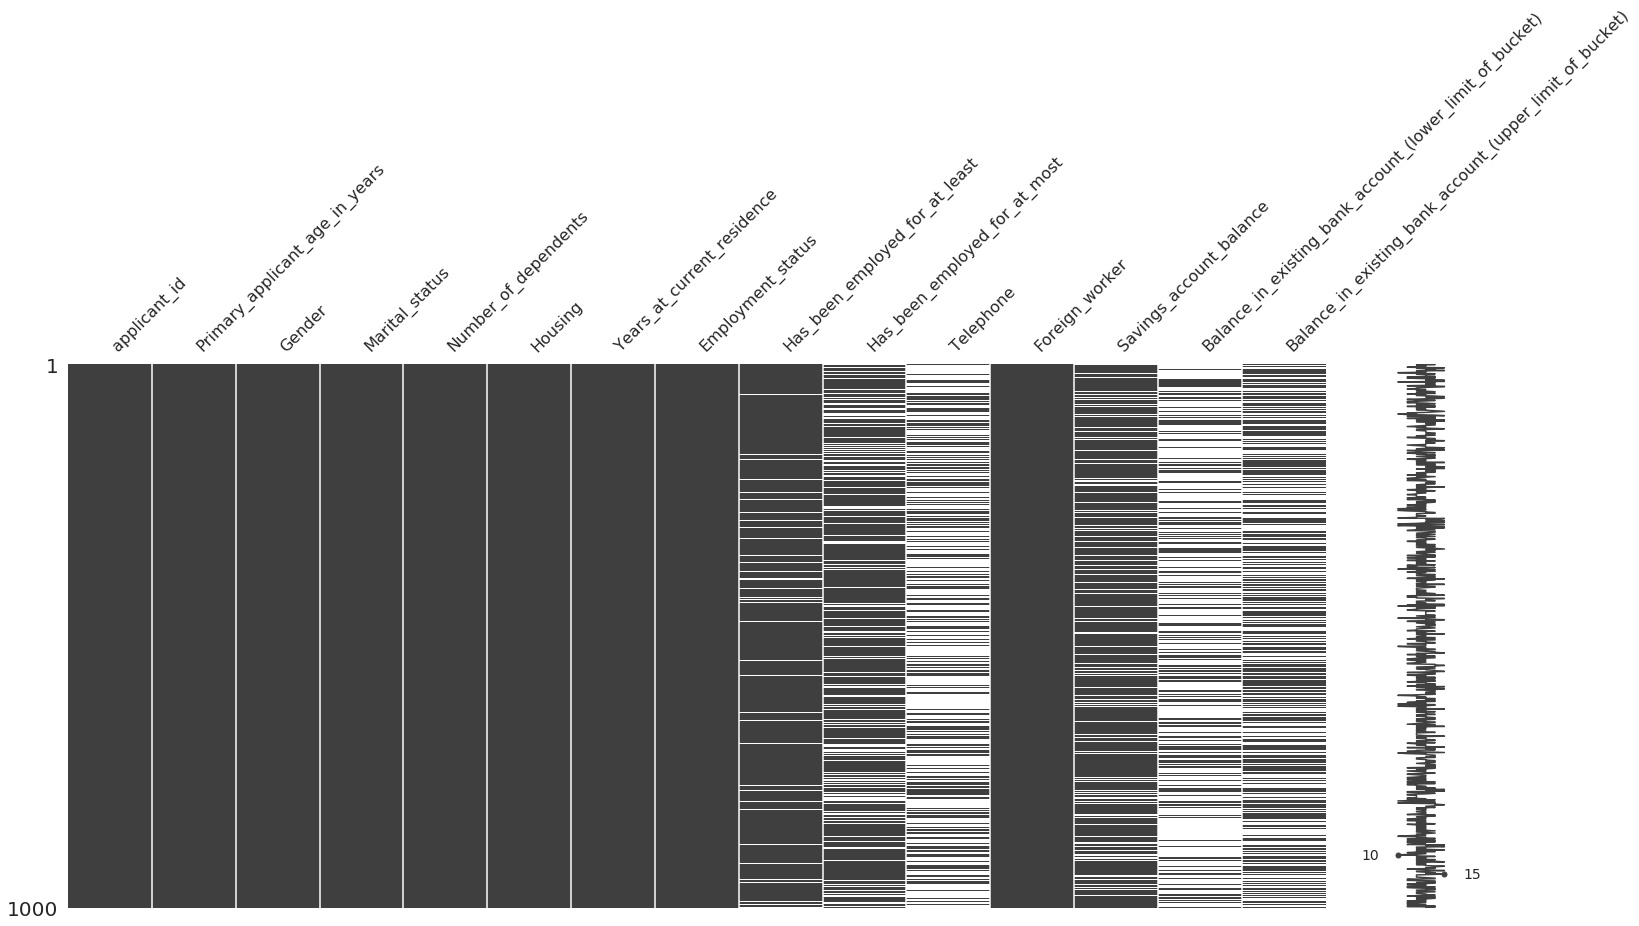

In [7]:
msno.matrix(applicant)

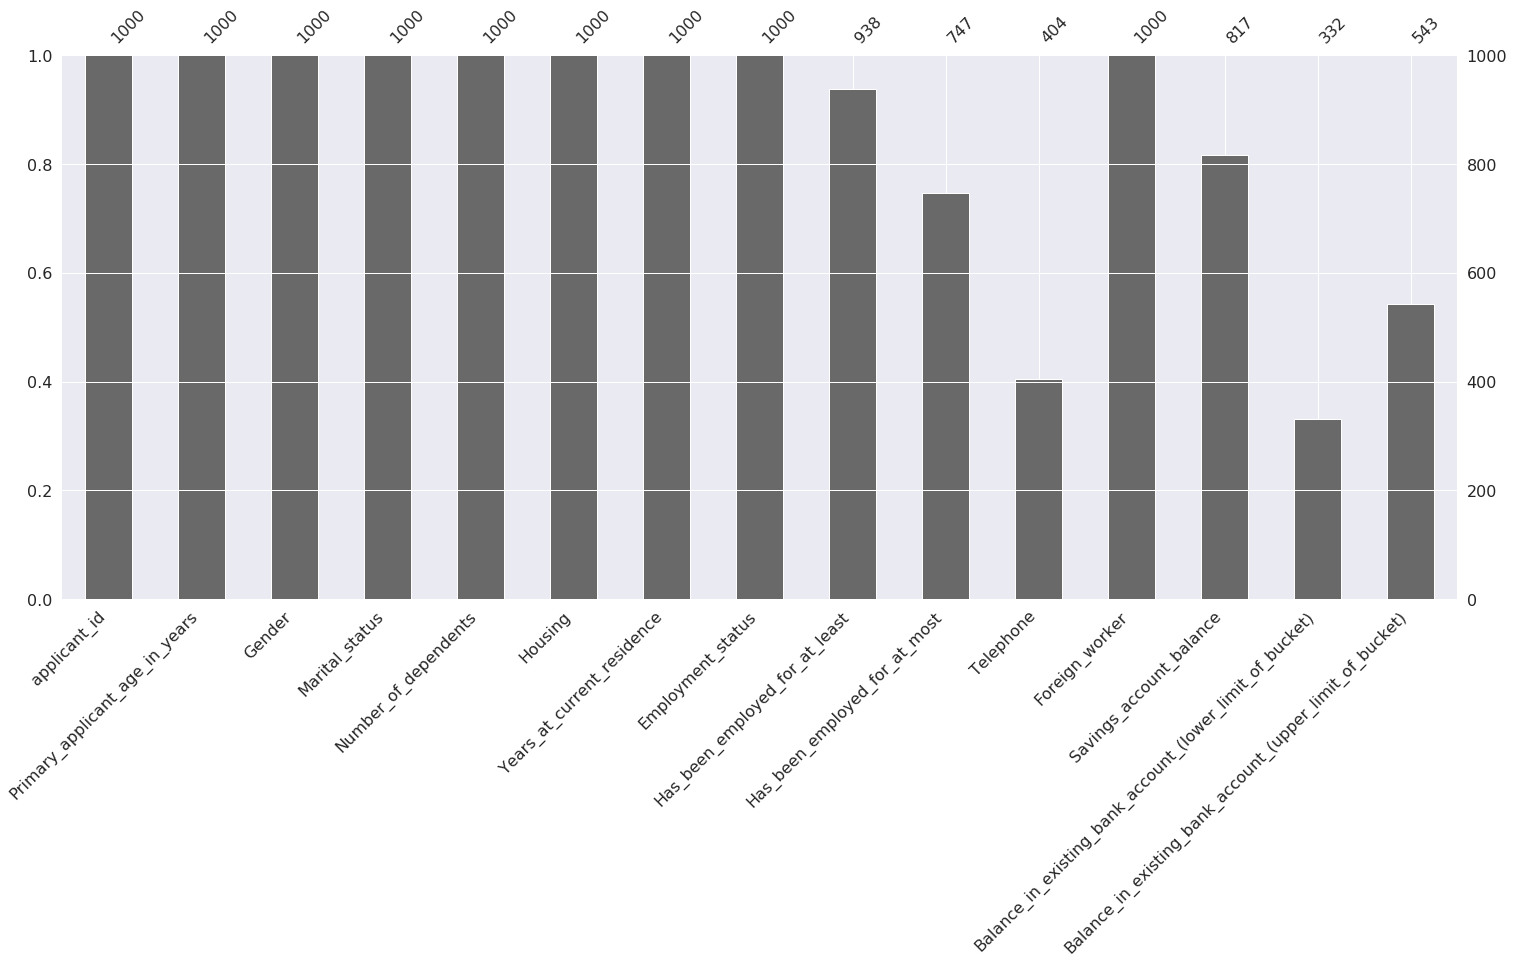

In [8]:
msno.bar(applicant)

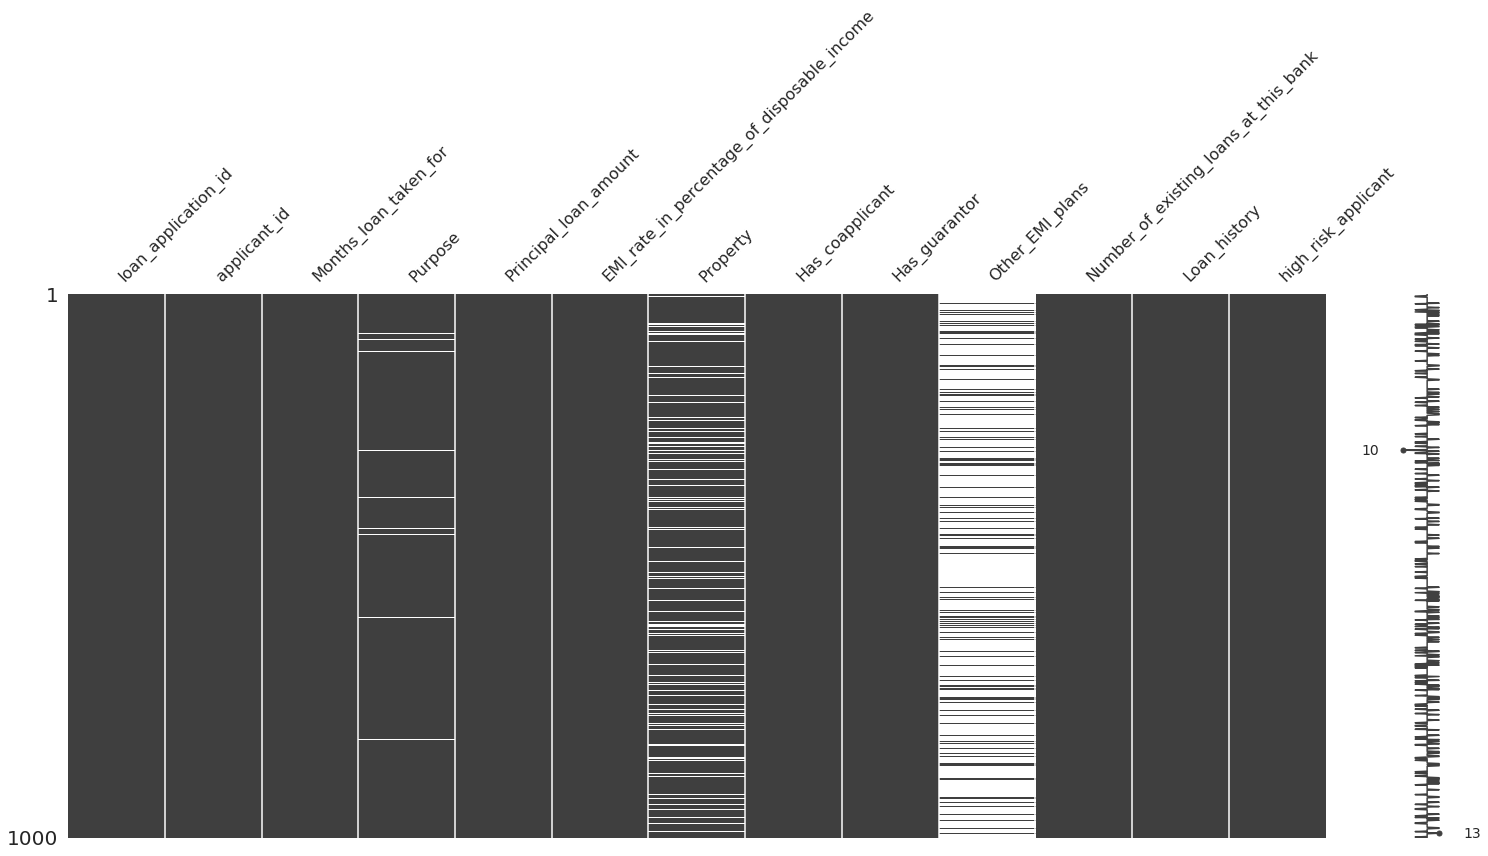

In [9]:
msno.matrix(loan)

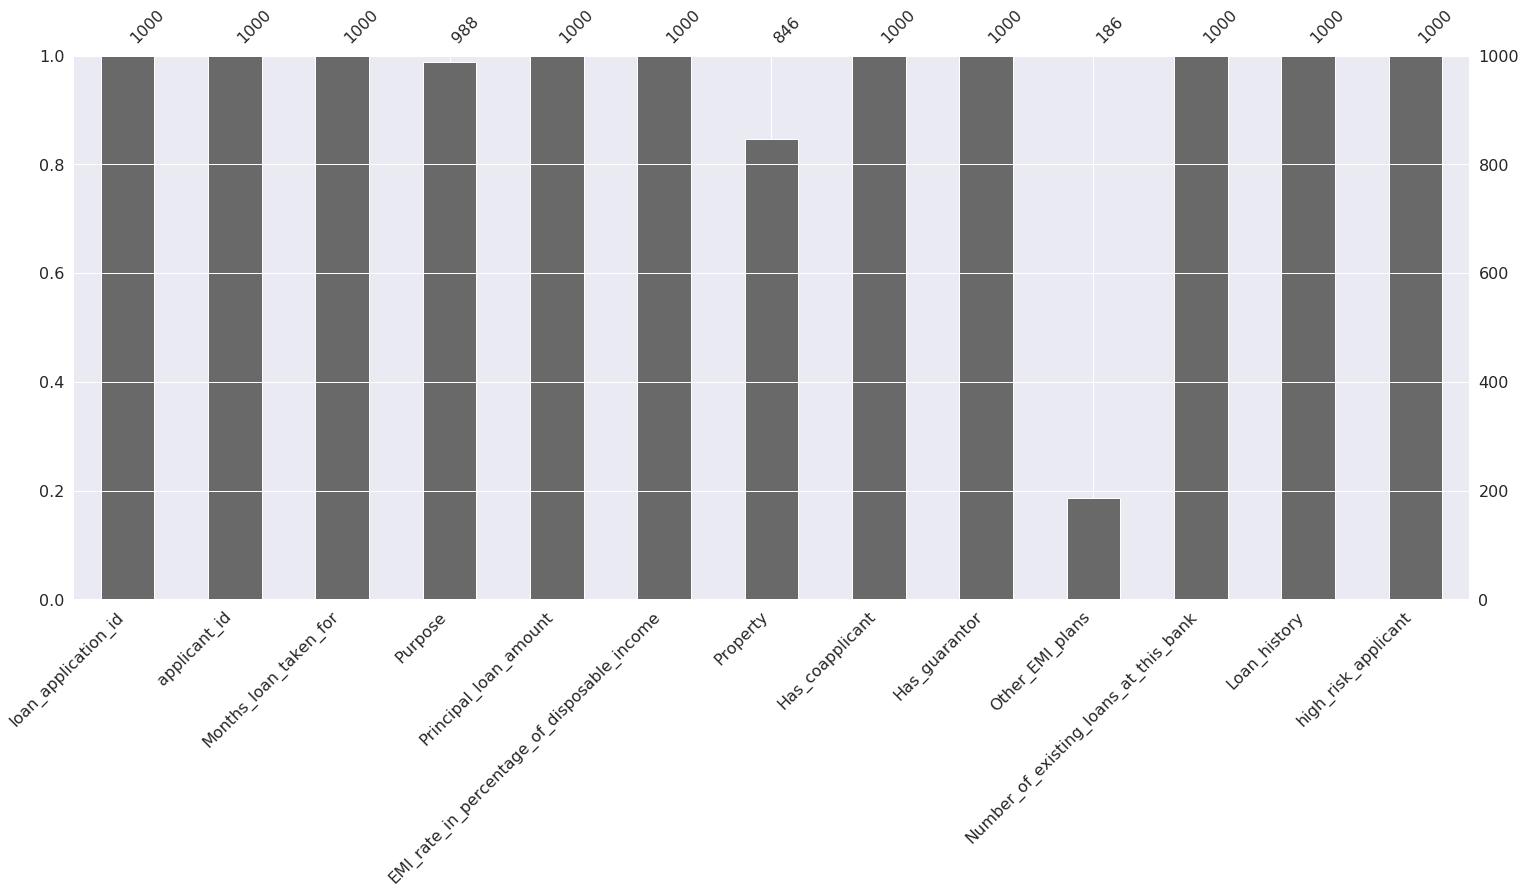

In [10]:
msno.bar(loan)

### Getting columns with most number of missing values

In [11]:
applicant_nan = applicant.isna().sum().to_frame('nans').sort_values(by='nans',ascending=False)
applicant_nan

nans
Balance_in_existing_bank_account_(lower_limit_o...   668
Telephone                                            596
Balance_in_existing_bank_account_(upper_limit_o...   457
Has_been_employed_for_at_most                        253
Savings_account_balance                              183
Has_been_employed_for_at_least                        62
applicant_id                                           0
Primary_applicant_age_in_years                         0
Gender                                                 0
Marital_status                                         0
Number_of_dependents                                   0
Housing                                                0
Years_at_current_residence                             0
Employment_status                                      0
Foreign_worker                                         0

In [12]:
loan_nan = loan.isna().sum().to_frame('nans').sort_values(by='nans',ascending=False)
loan_nan

nans
Other_EMI_plans                               814
Property                                      154
Purpose                                        12
loan_application_id                             0
applicant_id                                    0
Months_loan_taken_for                           0
Principal_loan_amount                           0
EMI_rate_in_percentage_of_disposable_income     0
Has_coapplicant                                 0
Has_guarantor                                   0
Number_of_existing_loans_at_this_bank           0
Loan_history                                    0
high_risk_applicant                             0

## merge the two dataframes

1. Check if applicant_id can be a primary key in one dataframe and foreign key in another.
2. Actually merge the dataframes

From below we can see that applicant_id seems like a good fit and we can merge the two datasets using the feature.

In [13]:
print(applicant.shape, loan.shape)

(1000, 15) (1000, 13)


In [14]:
(applicant.applicant_id == loan.applicant_id).sum()

1000

In [15]:
applicant_loan = pd.merge(applicant, loan, left_on = 'applicant_id', right_on = 'applicant_id')

### Congruency checks and asserts for the resultant dataset

In [16]:
applicant_loan.head(10)

applicant_id  Primary_applicant_age_in_years  Gender  \
0       1469590                              67    male   
1       1203873                              22  female   
2       1432761                              49    male   
3       1207582                              45    male   
4       1674436                              53    male   
5       1213971                              35    male   
6       1428822                              53    male   
7       1705739                              35    male   
8       1715169                              61    male   
9       1722991                              28    male   

               Marital_status  Number_of_dependents   Housing  \
0                      single                     1       own   
1  divorced/separated/married                     1       own   
2                      single                     2       own   
3                      single                     2  for free   
4                      single                     2  for free   
5                      single                     2  for free   
6                      single                     1       own   
7                      single                     1      rent   
8          divorced/separated                     1       own   
9             married/widowed                     1       own   

   Years_at_current_residence  \
0                           4   
1                           2   
2                           3   
3                           4   
4                           4   
5                           4   
6                           4   
7                           2   
8                           4   
9                           2   

                                   Employment_status  \
0                        skilled employee / official   
1                        skilled employee / official   
2                               unskilled - resident   
3                        skilled employee / official   
4                        skilled employee / official   
5                               unskilled - resident   
6                        skilled employee / official   
7  management / self-employed / highly qualified ...   
8                               unskilled - resident   
9  management / self-employed / highly qualified ...   

  Has_been_employed_for_at_least Has_been_employed_for_at_most  ...  \
0                        7 years                           NaN  ...   
1                         1 year                       4 years  ...   
2                        4 years                       7 years  ...   
3                        4 years                       7 years  ...   
4                         1 year                       4 years  ...   
5                         1 year                       4 years  ...   
6                        7 years                           NaN  ...   
7                         1 year                       4 years  ...   
8                        4 years                       7 years  ...   
9                            NaN                        0 year  ...   

                Purpose  Principal_loan_amount  \
0  electronic equipment                1169000   
1  electronic equipment                5951000   
2             education                2096000   
3                  FF&E                7882000   
4           new vehicle                4870000   
5             education                9055000   
6                  FF&E                2835000   
7          used vehicle                6948000   
8  electronic equipment                3059000   
9           new vehicle                5234000   

  EMI_rate_in_percentage_of_disposable_income  \
0                                           4   
1                                           2   
2                                           2   
3                                           2   
4                                           3   
5                            

In [17]:
assert(applicant_loan.shape[0] == applicant.shape[0])
assert(applicant_loan.shape[1] == applicant.shape[1] + loan.shape[1] - 1)

## Check the number of missing values in each column of the resultant dataframe

In [18]:
applicant_loan_nan = applicant_loan.isna().sum().to_frame('nans').sort_values(by='nans',ascending=False)

In [19]:
applicant_loan_nan['nans'] = (applicant_loan_nan['nans']/applicant_loan.shape[0])
applicant_loan_nan

nans
Other_EMI_plans                                     0.814
Balance_in_existing_bank_account_(lower_limit_o...  0.668
Telephone                                           0.596
Balance_in_existing_bank_account_(upper_limit_o...  0.457
Has_been_employed_for_at_most                       0.253
Savings_account_balance                             0.183
Property                                            0.154
Has_been_employed_for_at_least                      0.062
Purpose                                             0.012
Months_loan_taken_for                               0.000
Loan_history                                        0.000
Number_of_existing_loans_at_this_bank               0.000
Has_guarantor                                       0.000
Has_coapplicant                                     0.000
EMI_rate_in_percentage_of_disposable_income         0.000
Principal_loan_amount                               0.000
applicant_id                                        0.000
loan_application_id                                 0.000
Primary_applicant_age_in_years                      0.000
Foreign_worker                                      0.000
Employment_status                                   0.000
Years_at_current_residence                          0.000
Housing                                             0.000
Number_of_dependents                                0.000
Marital_status                                      0.000
Gender                                              0.000
high_risk_applicant                                 0.000

## Handling missing values
<a id='missingvals'></a>

### Drop columns

- **drop columns applicant_id and loan_application_id as all values in them are unique and the model can directly learn which applicant_id gives a certain value for target variable**

- **drop columns with more then 30% of the values in the column are missing or have nan**

In [20]:
drop_columns = list(applicant_loan_nan[applicant_loan_nan['nans']>0.3].index)
drop_columns.extend(['applicant_id', 'loan_application_id'])
print(applicant_loan.shape)
applicant_loan_v1 = applicant_loan.drop(drop_columns, axis='columns')
print(drop_columns)
print(applicant_loan.shape)
print(applicant_loan_v1.shape)

(1000, 27)
['Other_EMI_plans', 'Balance_in_existing_bank_account_(lower_limit_of_bucket)', 'Telephone', 'Balance_in_existing_bank_account_(upper_limit_of_bucket)', 'applicant_id', 'loan_application_id']
(1000, 27)
(1000, 21)


## Check the number of missing values in rows of the resultant dataframe

- As this analysis shows that atmost 4 missing values out of 21 are possible in a row.
- We can elminate the rows that have missing values greater then a certain threshold or divide the data into two subsets and compare the distribution of the columns for those subsets, but since the data is only 1000 rows we can't afford to do either.
- Its better that we just handle the missing values without eliminating any rows. 
- But before that we need to understand each column individually and handle categorical and mixed datatype columns properly.

In [21]:
missing_val_row = pd.DataFrame(applicant_loan_v1.isnull().sum(axis=1),columns=['missing_values'])
missing_val_row['temp'] = 1
missing_val_row.groupby(['missing_values']).sum().sort_values(ascending=False, by = 'temp')

temp
missing_values      
0                518
1                324
2                135
3                 22
4                  1

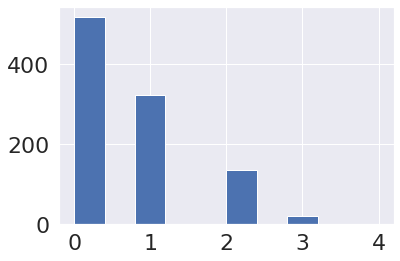

In [22]:
applicant_loan_v1.isnull().sum(axis=1).hist()

In [23]:
(135+22+1)/1000

0.158

## Check unique values for each column

In [24]:
temp_dtype=applicant_loan_v1.dtypes.to_frame('dtype').reset_index()
temp_dtype[temp_dtype['dtype']=='int64']

index  dtype
0                Primary_applicant_age_in_years  int64
3                          Number_of_dependents  int64
5                    Years_at_current_residence  int64
9                                Foreign_worker  int64
11                        Months_loan_taken_for  int64
13                        Principal_loan_amount  int64
14  EMI_rate_in_percentage_of_disposable_income  int64
16                              Has_coapplicant  int64
17                                Has_guarantor  int64
18        Number_of_existing_loans_at_this_bank  int64
20                          high_risk_applicant  int64

In [25]:
print("object:")
for col in temp_dtype[temp_dtype['dtype']==object]['index']:
    print(col,'::::::::::',applicant_loan_v1[col].nunique(),applicant_loan_v1[col].unique())
print("in64:")
for col in temp_dtype[temp_dtype['dtype']=='int64']['index']:
    if applicant_loan_v1[col].nunique() <= 10:
        print(col,'::::::::::',applicant_loan_v1[col].nunique(), applicant_loan_v1[col].unique())
    else:
        print(col,'::::::::::',applicant_loan_v1[col].nunique())

object:
Gender :::::::::: 2 ['male' 'female']
Marital_status :::::::::: 4 ['single' 'divorced/separated/married' 'divorced/separated'
 'married/widowed']
Housing :::::::::: 3 ['own' 'for free' 'rent']
Employment_status :::::::::: 4 ['skilled employee / official' 'unskilled - resident'
 'management / self-employed / highly qualified employee / officer'
 'unemployed / unskilled - non-resident']
Has_been_employed_for_at_least :::::::::: 4 ['7 years' '1 year' '4 years' nan '0 year']
Has_been_employed_for_at_most :::::::::: 4 [nan '4 years' '7 years' '0 year' '1 year']
Savings_account_balance :::::::::: 4 [nan 'Low' 'High' 'Very high' 'Medium']
Purpose :::::::::: 9 ['electronic equipment' 'education' 'FF&E' 'new vehicle' 'used vehicle'
 'business' 'domestic appliances' 'repair costs' nan 'career development']
Property :::::::::: 3 ['real estate' 'building society savings agreement/life insurance' nan
 'car or other']
Loan_history :::::::::: 5 ['critical/pending loans at other banks'
 'exist

## Handle categorical, mixed type features
<a id='cat_features'></a>
First we have to sort the features into these categories:
- Categorical and binary
- mixed type
- Numerical

This division should be done carefully. 
- The main point to remember to sort a feature as categorical is that the values cannot be intrinsically ordered between themselves. 
- And even though some features seem that they can be sorted as categorical because they have limited values but they cannot because each of the values have a specific weight to them, hence must be sorted as numerical features.
- I have put a third category over here, which is mixed features, because i am ambiguous on whether they should be numerical or categorical
<!-- , as these are the features which needed to be converted and sorted as numerical data. -->
- Its better to perform one hot encoding on binary features as well, as it will provide better principal component interpretation and how the association between features in each component.

In [26]:
categorical_feature=['Marital_status','Housing', 'Employment_status','Savings_account_balance','Purpose','Property','Loan_history','Has_been_employed_for_at_least','Has_been_employed_for_at_most','Foreign_worker', 'Has_coapplicant','Has_guarantor','Gender']
binary_features = ['high_risk_applicant']
mixed_features = ['Has_been_employed_for_at_least','Has_been_employed_for_at_most']
numerical_features = ['Primary_applicant_age_in_years','Number_of_dependents', 'Years_at_current_residence', 'Months_loan_taken_for', 'Principal_loan_amount','EMI_rate_in_percentage_of_disposable_income', 'Number_of_existing_loans_at_this_bank']

In [27]:
# Fill nan 
applicant_loan_v1[mixed_features[0]] = [applicant_loan_v1[mixed_features[1]].iloc[n] if str(i) == 'nan' else i for n,i in enumerate(applicant_loan_v1[mixed_features[0]])]
applicant_loan_v1[mixed_features[1]] = [applicant_loan_v1[mixed_features[0]].iloc[n] if str(i) == 'nan' else i for n,i in enumerate(applicant_loan_v1[mixed_features[1]])]

### The commented section below, was an attempt to convert mixed features to numerical features, but now i feel that keeping them as categorical features would be more insightful at the time of interpreting the Principal components of the PCA.

In [28]:
# #### Convert the mixed feature to numerical features
#mixed_features = ['Has_been_employed_for_at_least','Has_been_employed_for_at_most']

# Here there are few point to be noted.
# - I feel that these columns should not be as categorical as the number of years should have some numerical weight to it and would aid the model more in classifying the applicant.
# - These two mixed features have nan values but there is a pattern to it. There is a nan value in 'Has_been_employed_for_at_least' when the feature 'Has_been_employed_for_at_most' has the value '0 years' and similarly the feature 'Has_been_employed_for_at_most' has a nan value when 'Has_been_employed_for_at_least' has the value '7 years'. I feel there is no harm in eliminating the nan values by replacing them with the same value as in the other feature.

# applicant_loan_v1[mixed_features].iloc[:30]

# # Fill nan 
# applicant_loan_v1[mixed_features[0]] = [applicant_loan_v1[mixed_features[1]].iloc[n] if str(i) == 'nan' else i for n,i in enumerate(applicant_loan_v1[mixed_features[0]])]
# applicant_loan_v1[mixed_features[1]] = [applicant_loan_v1[mixed_features[0]].iloc[n] if str(i) == 'nan' else i for n,i in enumerate(applicant_loan_v1[mixed_features[1]])]

# # Convert the mixed feature to numerical features
# applicant_loan_v1[mixed_features[0]] = [str(i)[0] for i in applicant_loan_v1[mixed_features[0]]]
# applicant_loan_v1[mixed_features[1]] = [str(i)[0] for i in applicant_loan_v1[mixed_features[1]]]

# applicant_loan_v1[mixed_features]

### Get the one hot encoding for categorical features

- The nan values are present in the categorical features, instead of eliminating those row, there is a high chance that the nan values might represent a certain population in the data, and we might loose to represent those group if we eliminate those data points, so its better to treat those nan values as a separate category.

In [29]:
applicant_loan_v2 = pd.get_dummies(applicant_loan_v1, dummy_na=True, columns = categorical_feature)

In [30]:
applicant_loan_v2.shape

(1000, 69)

### As you can see there are no nan values in the resultant dataset.

In [31]:
applicant_loan_v2.isna().sum().to_frame('nans').sort_values(by='nans',ascending=False).sum()

nans    0
dtype: int64

## Feature transformation:
<a id='feattrans'></a>
Apply feature scaling to the data.

There is one point which we need to give thought to:

Does it make sense to apply transformation to one hot encoded features?
I believe it does not, as One-hot encoding implies the level of the measurement for a feature is nominal / categorial. Standardization implies the level of measure for a features is at least interval. 

Example, if the feature is country of origin. Since that feature is categorical, one-hot encoding makes sense. A person is from a country or not. Taking the mean of the country of origin yields numbers that do not make sense.

So i will only apply feature transformation on variables that are not categorical or binary features.

Reference: [Link](https://datascience.stackexchange.com/questions/80234/possible-harm-in-standardizing-one-hot-encoded-features)

In [32]:
scaler = StandardScaler()
features_transform = numerical_features
applicant_loan_v2[features_transform] = scaler.fit_transform(applicant_loan_v2[features_transform])
applicant_loan_v2.head()

Primary_applicant_age_in_years  Number_of_dependents  \
0                        2.766456             -0.428290   
1                       -1.191404             -0.428290   
2                        1.183312              2.334869   
3                        0.831502              2.334869   
4                        1.535122              2.334869   

   Years_at_current_residence  Months_loan_taken_for  Principal_loan_amount  \
0                    1.046987              -1.236478              -0.745131   
1                   -0.765977               2.248194               0.949817   
2                    0.140505              -0.738668              -0.416562   
3                    1.046987               1.750384               1.634247   
4                    1.046987               0.256953               0.566664   

   EMI_rate_in_percentage_of_disposable_income  \
0                                     0.918477   
1                                    -0.870183   
2                                    -0.870183   
3                                    -0.870183   
4                                     0.024147   

   Number_of_existing_loans_at_this_bank  high_risk_applicant  \
0                               1.027079                    0   
1                              -0.704926                    1   
2                              -0.704926                    0   
3                              -0.704926                    0   
4                               1.027079                    1   

   Marital_status_divorced/separated  \
0                                  0   
1                                  0   
2                                  0   
3                                  0   
4                                  0   

   Marital_status_divorced/separated/married  ...  Foreign_worker_nan  \
0                                          0  ...                   0   
1                                          1  ...                   0   
2                                          0  ...                   0   
3                                          0  ...                   0   
4                                          0  ...                   0   

   Has_coapplicant_0.0  Has_coapplicant_1.0  Has_coapplicant_nan  \
0                    1                    0                    0   
1                    1                    0                    0   
2                    1                    0                    0   
3                    1                    0                    0   
4                    1                    0                    0   

   Has_guarantor_0.0  Has_guarantor_1.0  Has_guarantor_nan  Gender_female  \
0                  1                  0                  0              0   
1                  1                  0                  0              1   
2                  1                  0                  0              0   
3                  0                  1                  0              0   
4                  1                  0                  0              0   

   Gender_male  Gender_nan  
0            1           0  
1            0           0  
2            1           0  
3            1           0  
4            1           0  

[5 rows x 69 columns]

In [33]:
applicant_loan_v2.shape

(1000, 69)

## Some insight of the data
<a id='insights'></a>

- I have decided to use a count plot for categorical and a few numerical variables.
- And for other variables i have used box plots.

In [34]:
# for categorical data
def counterplot(df, features, target=True):
    fig,axes = plt.subplots(math.ceil(len(features)/2),2,figsize=(28,70))
    for idx,cat_col in enumerate(features):
        row,col = idx//2,idx%2
        if target == True:
            ax = sns.countplot(x=cat_col,data=df,hue='high_risk_applicant',ax=axes[row,col])
        else:
            ax = sns.countplot(x=cat_col,data=df,ax=axes[row,col])
        ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right",fontsize=15)

    plt.subplots_adjust(hspace=0.6)

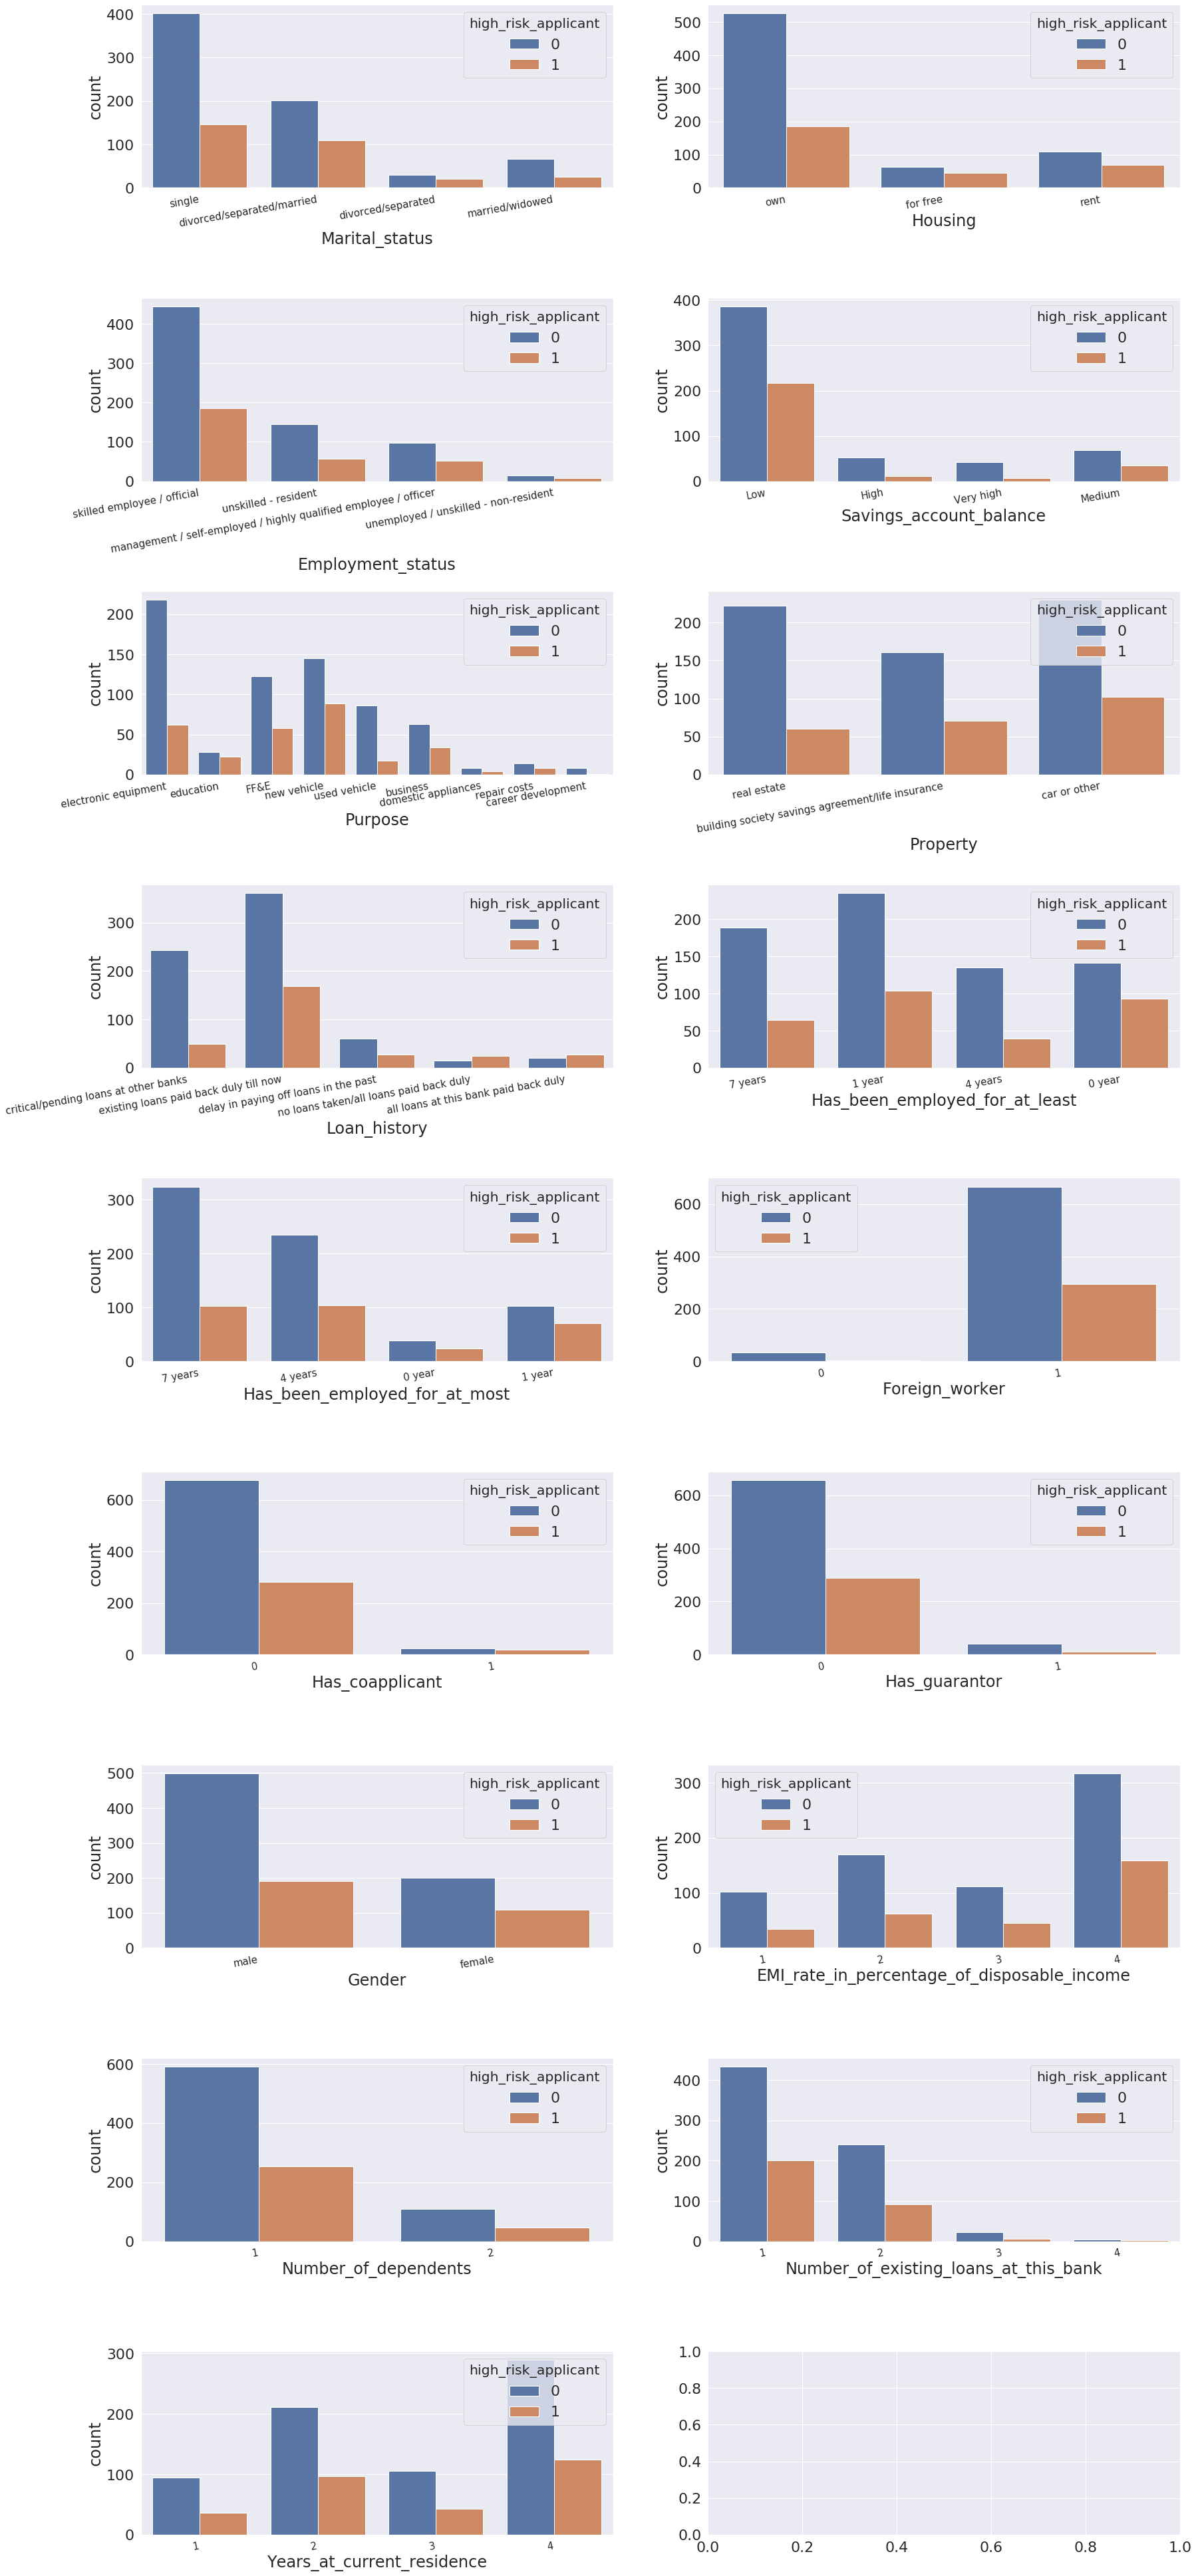

In [35]:
other_numerical_features = np.setdiff1d(numerical_features,['Primary_applicant_age_in_years','Months_loan_taken_for','Principal_loan_amount'])
features = list(categorical_feature) + list(other_numerical_features)
counterplot(applicant_loan_v1, features)

In [36]:
#For 'Primary_applicant_age_in_years','Months_loan_taken_for','Principal_loan_amount'
def boxplotter(df,xaxis=True):
    fig,axes = plt.subplots(1,3,figsize=(40,15))
#     sns.set(font_scale = 0.5)
    for idx,cat_col in enumerate(['Primary_applicant_age_in_years','Months_loan_taken_for','Principal_loan_amount']):
        if xaxis == True:
            p = sns.boxplot(y=cat_col,data=df,x='high_risk_applicant',ax=axes[idx])
            p.set_xlabel("high_risk_applicant", fontsize = 20)
        else: 
            p = sns.boxplot(y=cat_col,data=df,ax=axes[idx])
            p.set_xlabel("X-Axis", fontsize = 20)
        
        p.set_ylabel(cat_col, fontsize = 20)
        p.ticklabel_format(style='plain', axis='y')


    # print(train_df[numerical_columns].describe())
    plt.subplots_adjust(hspace=1)
    

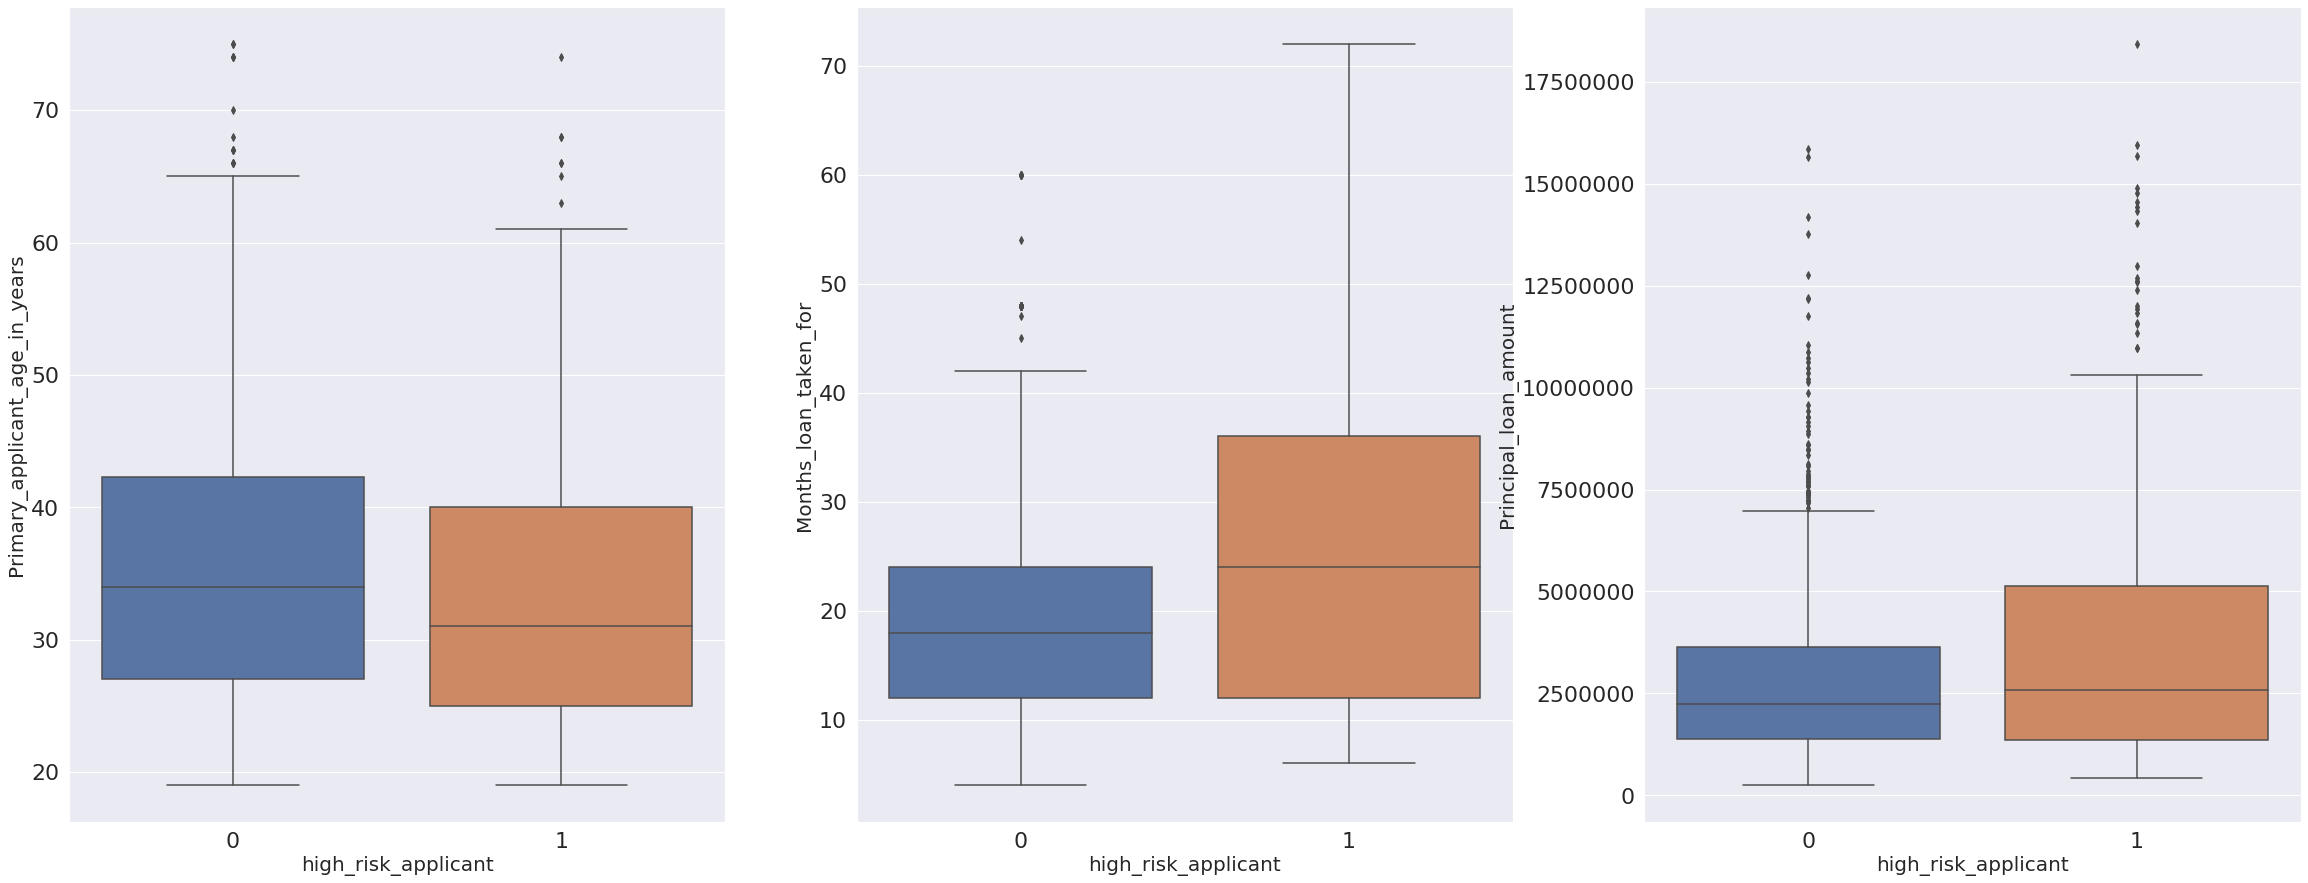

In [37]:
boxplotter(applicant_loan_v1)

## Some changes in plots:

- Box plots seem to be descriptive.
- But the count plot seems to be confusing, instead i will use a normal bar graph to depict the ratio of low risk applicant wrt total number of applicant.

In [38]:
list(categorical_feature) + list(other_numerical_features)

['Marital_status',
 'Housing',
 'Employment_status',
 'Savings_account_balance',
 'Purpose',
 'Property',
 'Loan_history',
 'Has_been_employed_for_at_least',
 'Has_been_employed_for_at_most',
 'Foreign_worker',
 'Has_coapplicant',
 'Has_guarantor',
 'Gender',
 'EMI_rate_in_percentage_of_disposable_income',
 'Number_of_dependents',
 'Number_of_existing_loans_at_this_bank',
 'Years_at_current_residence']

In [45]:
def ratio_plotter(df, features, cluster=False):
    fig,axes = plt.subplots(math.ceil(len(features)/2),2,figsize=(28,70))
    print(categorical_feature)

    for idx,cols in enumerate(features):
        row,col = idx//2,idx%2
        lst1 = applicant_loan_v1[cols].unique()
        lst1 = [x for x in lst1 if x==x]
        if cluster == False:
            lst2 = [(applicant_loan_v1[(applicant_loan_v1[cols] == value) & (applicant_loan_v1['high_risk_applicant'] == 0)].shape[0])/(((applicant_loan_v1[(applicant_loan_v1[cols] == value) & (applicant_loan_v1['high_risk_applicant'] == 0)].shape[0]) + (applicant_loan_v1[(applicant_loan_v1[cols] == value) & (applicant_loan_v1['high_risk_applicant'] == 1)].shape[0]))) for value in lst1]
        else:
            lst2 = [(df[(df[cols] == value)].shape[0])/applicant_loan_v1[(applicant_loan_v1[cols] == value)].shape[0] for value in lst1]
        df1 = pd.DataFrame(lst2)
        df1.columns = ['ratio']
        df1[cols] = lst1
        ax = sns.barplot(x=df1[cols], y = df1['ratio'], ax=axes[row,col])
        ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right",fontsize=15)

    plt.subplots_adjust(hspace=1)    

['Marital_status', 'Housing', 'Employment_status', 'Savings_account_balance', 'Purpose', 'Property', 'Loan_history', 'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most', 'Foreign_worker', 'Has_coapplicant', 'Has_guarantor', 'Gender']


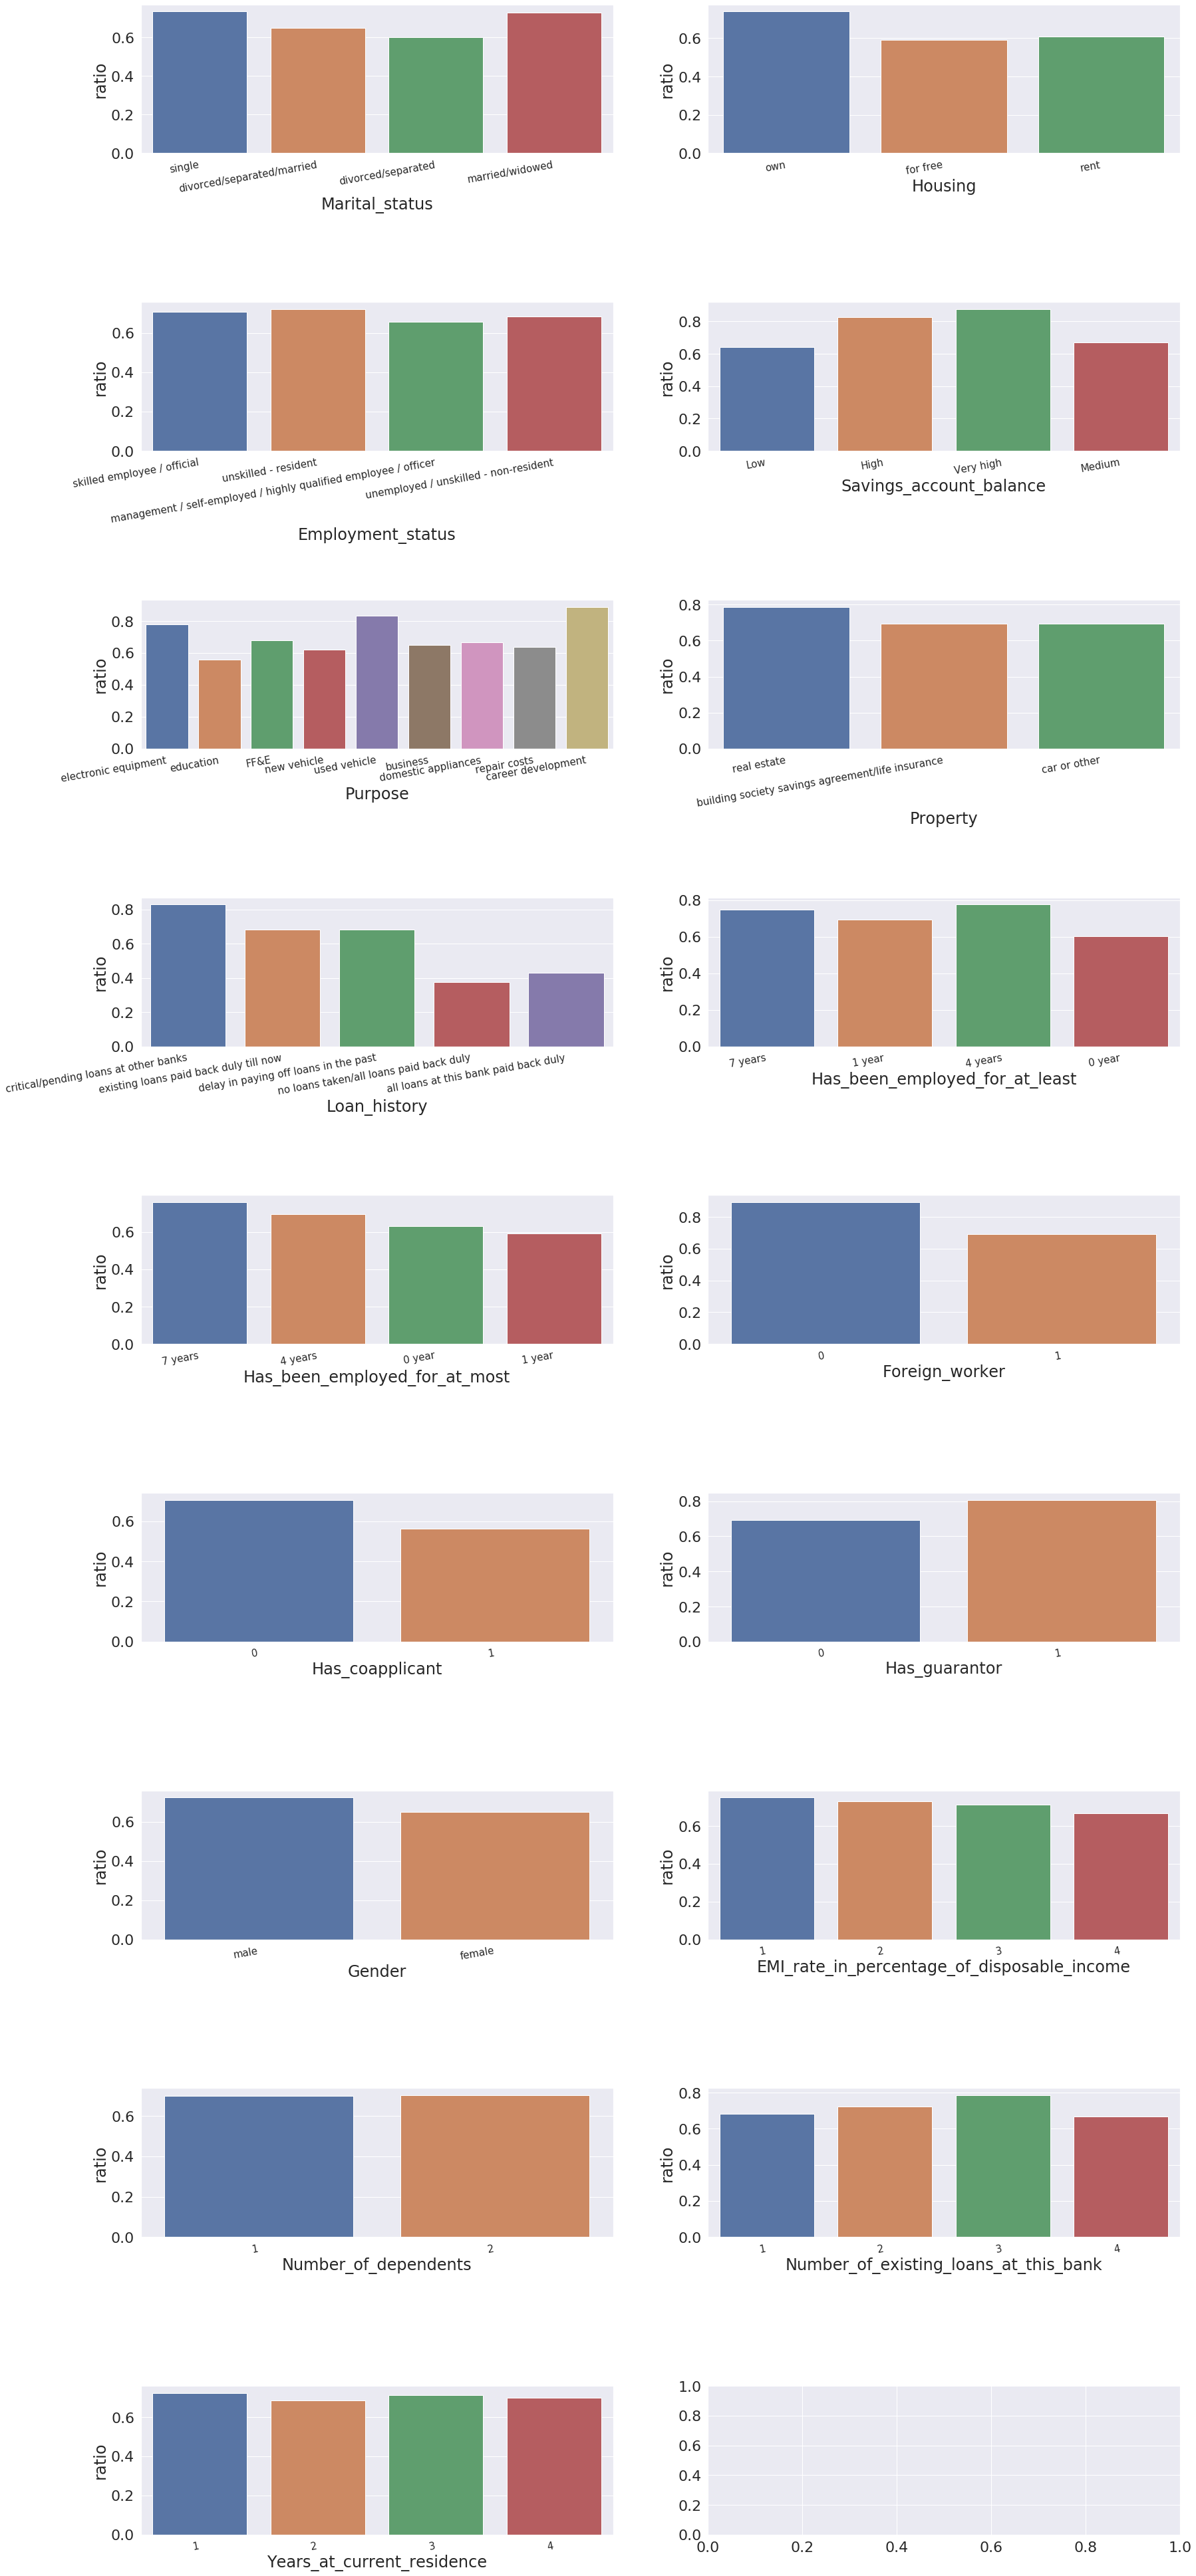

In [46]:
ratio_plotter(applicant_loan_v1,features)

## Interpretation of the above graphs:
<a id='graph_explain'></a>

First of all let us understand what the ratio means in the graphs plotted above: For a given category, the proportion of low risk applicants to that of total applicant(in that category). So higher the value for that category the more reliable or less risky the category of applicants are.

Now lets start with the interpretation for each of the plots above:

**Marital_status**:

- Single and Married/widowed have the most number of low risk applicants.
- Then comes divorced/separated/married and divorced/seperated

**Housing**:

- People who own their own house are of the lowest risk.
- Second comes applicants who pay rent and lastly comes the people who live in a residence for free.

**Employment status**:

- Here all the values are pretty smilar but from the minor difference, the results seem to go exactly opposite to our intiution, which is unskilled-resident applicants are of lowest risk and management/ highly skilled officials are at highest risk. 

- This may be due to the kind of loan they take, unskilled residents are likely to take small loans which will most likely be approved but the highly skilled officials might take big loans which sometime might now be approved.

**Savings_account_balance**:

- The values are as expected, applicants with very high balance have are considered low risk, whereas low balance are considered high risk.

**Purpose**:

- loans taken for electronic equipments, used vehicle and career development(comparetively low cost) are considered low risk and hence easily approved. 
- Whereas education and businness loans are high cost and hence risky and not easily approved.

**Property**:

- Applicants with real estate as property are considered low risk, whereas other applicants with either car or only life insurance as propery or asset are considered high risk.

**Loan_history**:

- This is a little surprising, the applicants with critical/pending loans have the highest value or are considered low risk, this does not make sense to me. And applicants with no loan history and no pending payments are considered as high risk.


**Has_been_employed_for_at_least** and **Has_been_employed_for_at_most:**

- Applicants with atleast and atmost 4 years or 7 years of work experience are considered low risk and applicants with less experience are considered high risk, which makes sense.

The last few features are binary, to conclude applicants who are **foreign workers**, who have a **co-applicant**, **do not have a gaurantor** and who are **females** are considered high risk.

And low EMI rate is considered as less risky, whereas number of dependents do not matter much. And applicants with 2 or 3  existing loans at the bank increases reliability and hence reduces risk.

I believe some of the features which are not behaving as expected are doing so because these features are correlated with other features and the anomalies are due to the trends and patterns that the other features follow.

### Now all of these observations above will help us shortlist the clusters or customer segements we should approve for loan!

# Dimensionality reduction and clustering
<a id='pca'></a>
- For this section we do not have any need of the target variable i.e. high_risk_applicant. It is an unsupervised method similar to Principal Component Analysis that only looks at the relationship among the input variables. 

- So we will drop the target variable and perfrom pca and clustering on the data.

In [48]:
applicant_loan_v3 = applicant_loan_v2.drop(['high_risk_applicant'], axis='columns')

In [49]:
applicant_loan_v3.shape

(1000, 68)

In [50]:
# Apply PCA to the data.

pca = PCA()
applicant_loan_pca = pca.fit_transform(applicant_loan_v3)

### Scree plot:

The scree plot is used to determine the number of factors to retain in an exploratory factor analysis (FA) or principal components to keep in a principal component analysis (PCA).

We will check the variance that is represented by the number of pca components, and we will keep only as much components which is enough to represent 90% variance of the original data.

Finally, keeping only 23 components as its represnts 92% of the variance of the data, which seems good enough.

It was also observed that the last 20 components had negligible impact on capturing the variability, this shows the capability of PCA to do dimensionality reduction without any loss of variability.

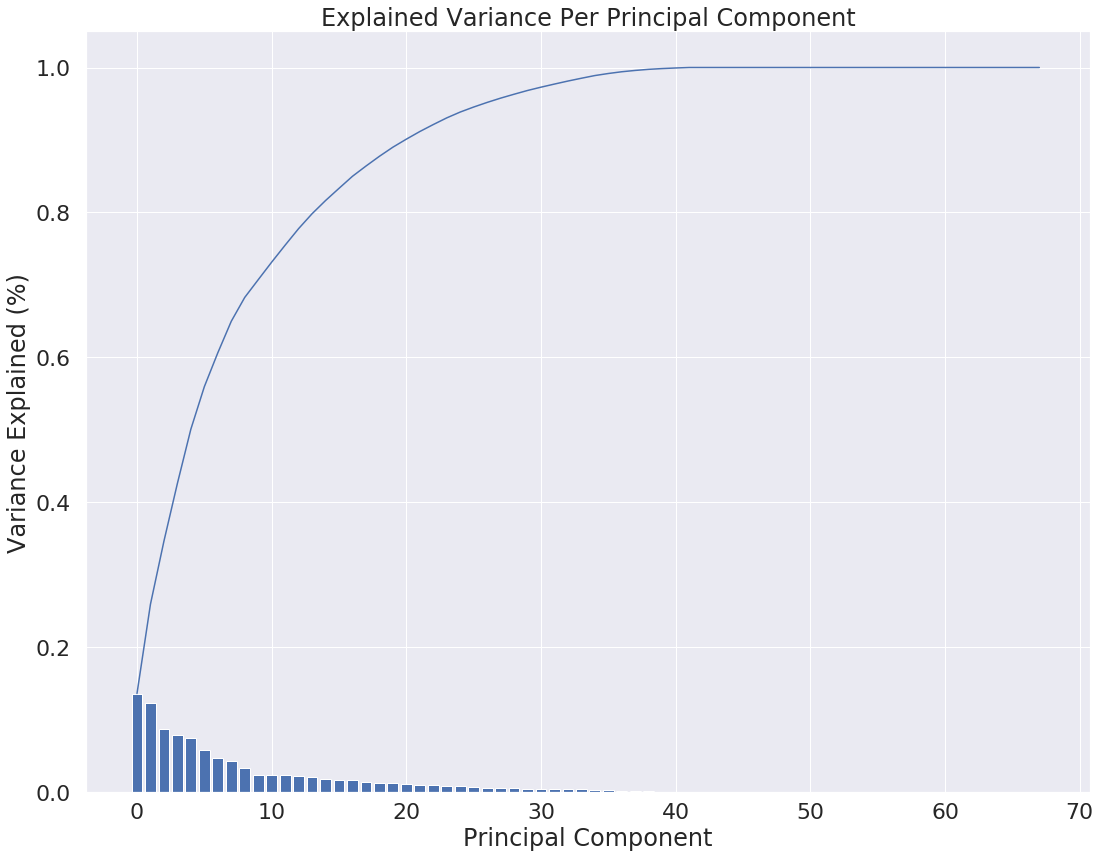

In [51]:
scree_plot(pca)

In [52]:
for i in np.arange(1, len(pca.explained_variance_ratio_)):
    print('{} components explains {}% of variance'.format(i,(pca.explained_variance_ratio_[:i].sum()) * 100))

1 components explains 13.627970377074435% of variance
2 components explains 25.94905488249176% of variance
3 components explains 34.64797544264646% of variance
4 components explains 42.61331797087852% of variance
5 components explains 50.101545373443244% of variance
6 components explains 55.957534051589086% of variance
7 components explains 60.63206385158701% of variance
8 components explains 64.98420211596371% of variance
9 components explains 68.27678874435213% of variance
10 components explains 70.71963327485632% of variance
11 components explains 73.14423895602644% of variance
12 components explains 75.4863426895244% of variance
13 components explains 77.76858898002457% of variance
14 components explains 79.8247436783466% of variance
15 components explains 81.64327635209717% of variance
16 components explains 83.32743728380426% of variance
17 components explains 84.9907298702935% of variance
18 components explains 86.39928183310552% of variance
19 components explains 87.74870520116

In [53]:
# Re-apply PCA to the data while selecting for number of components to retain.

pca = PCA(n_components=23)
applicant_loan_pca = pca.fit_transform(applicant_loan_v3)

## 2. How would you segment customers based on their risk (of default).
<a id='explain'></a>
- The most common way to segment the applicants is to do profiling, build a score card and do clustering.
- The process of building a profile and scorecard for each applicant includes a pre-requisite of assigning a weight to the features in the dataset. The weights denote how important the feature is towards deciding whether the applicant is credible or not.
- After the weights are assigned, we divide the total scores into quartiles, the fourth quartile being the most credible and first quartile being the least credible. 

**Now here comes the main part, please read it carefully and I will try to explain it as best I can.**

**I really think I'm onto something here!**

- I was thinking that since I am a noob and have close to zero domain knowledge, so I'm the least credible person to assign weigths to the features which will intrurn decide the credibility of the applicant.
- Instead I think its better to take help of PCA to score the features for us.
- Here is why and how it would work, we know that PCA is used for dimensionality reduction but we also know that each of the principle components represent some amount of variability of the dataset, to be specific it is a unit vector that points in the direction of highest variance. The values in the vector correspond to the weight each feature holds in that component. And we are going to this to our advantage.
- So the first few principal components account for most of the variability of the data, so we can select the top 5 or 10 components and sum the weights for each of the features accross the selected components and the resultant values can be used for weighting the features for the score card. 
- My intitution behind why this will work is as follows, we know that the data was curated or collected in order to decide the credibility of the applicant, now even though we are not using our target feature anywhere over here we can see observe trend and patterns that will lead to the final decision(which is to decide is the applicant creditworthy or not) and this trend and patterns is captured by the principal components in the form of variability! So if a feature hold high weight again and again in multiple principal components we can say it is important for the decision making process and hence the final high score/value we get(as mentioned in the above point) is equivalent to an expert assigning high weight to a feature which will then help in making the score card and hence customer profiling or segmentation. BA-DUM-TSSS!

### Lets interpret the Principal Components
<a id='interpretationpca'></a>
- Each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). 
- The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. 
- To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.
- We will investigate this association by observing the weight of features in the top 3 principal components. 
- The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list.

In [54]:
def pca_results(full_dataset, pca, comp_number,feature_count):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''

    # PCA components
    component = pd.DataFrame(np.round(pca.components_, 4), columns = full_dataset.keys()).iloc[comp_number-1]
    component.sort_values(ascending=False, inplace=True)
    # Capturing most interesting features which at the end and beginning of sorted list
    component = pd.concat([component.head(feature_count), component.tail(feature_count)])
    
    component.plot(kind='bar', 
                  title='top {} weighted features for PCA component {}'.format(feature_count*2, comp_number),
                  figsize=(12, 6));
    plt.show()
    return component

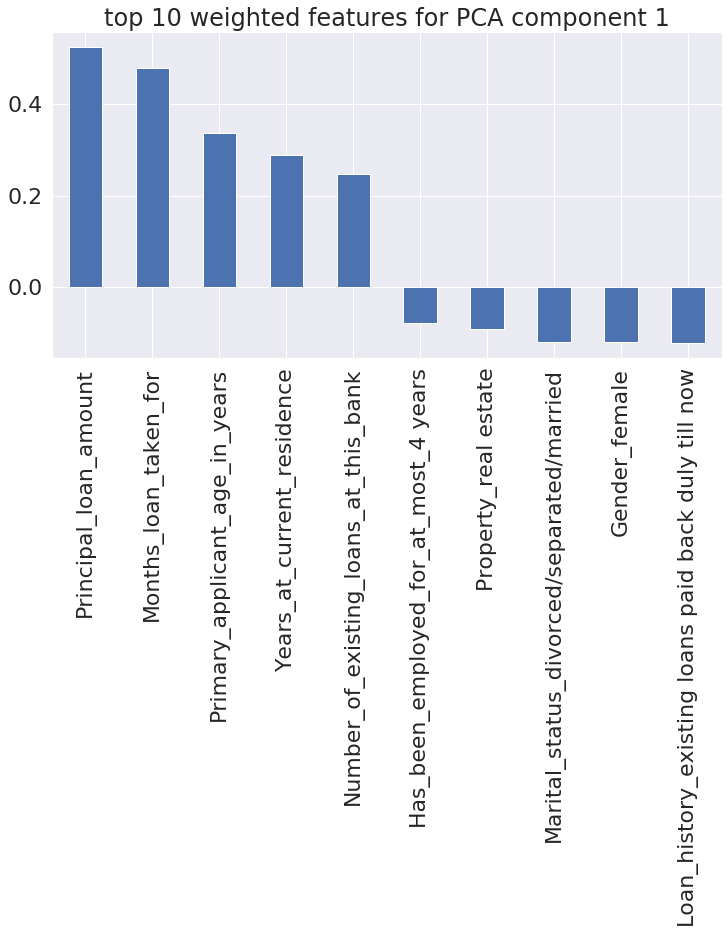

Principal_loan_amount                                  0.5241
Months_loan_taken_for                                  0.4787
Primary_applicant_age_in_years                         0.3354
Years_at_current_residence                             0.2885
Number_of_existing_loans_at_this_bank                  0.2474
Has_been_employed_for_at_most_4 years                 -0.0777
Property_real estate                                  -0.0900
Marital_status_divorced/separated/married             -0.1196
Gender_female                                         -0.1196
Loan_history_existing loans paid back duly till now   -0.1223
Name: 0, dtype: float64

In [55]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.

pca_results(applicant_loan_v3,pca,1,5)

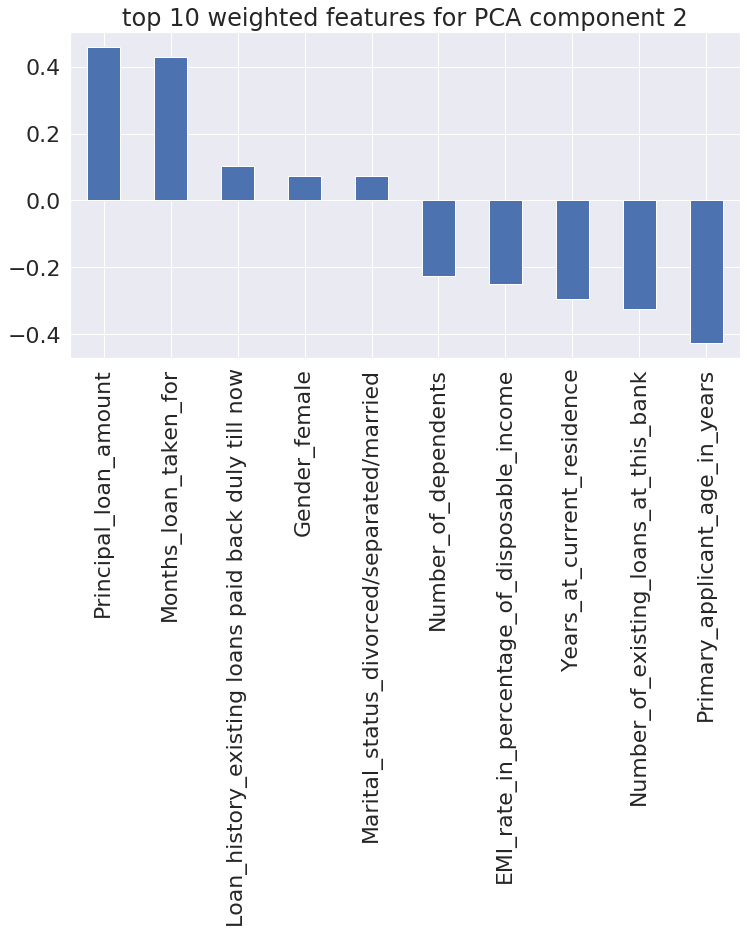

Principal_loan_amount                                  0.4589
Months_loan_taken_for                                  0.4289
Loan_history_existing loans paid back duly till now    0.1043
Gender_female                                          0.0718
Marital_status_divorced/separated/married              0.0718
Number_of_dependents                                  -0.2250
EMI_rate_in_percentage_of_disposable_income           -0.2483
Years_at_current_residence                            -0.2943
Number_of_existing_loans_at_this_bank                 -0.3254
Primary_applicant_age_in_years                        -0.4268
Name: 1, dtype: float64

In [56]:
pca_results(applicant_loan_v3,pca,2,5)

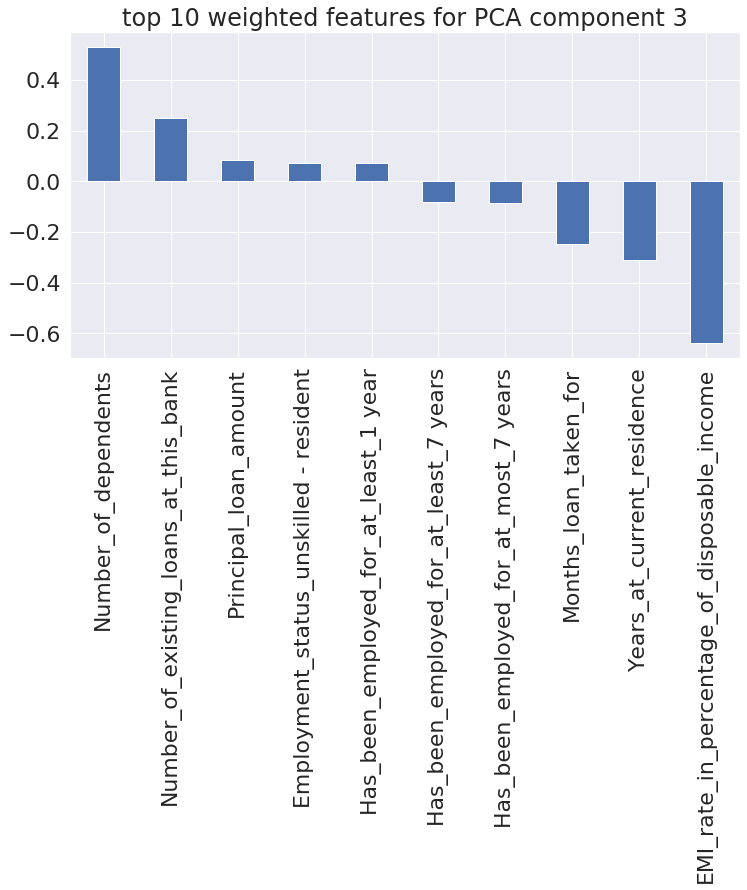

Number_of_dependents                           0.5315
Number_of_existing_loans_at_this_bank          0.2486
Principal_loan_amount                          0.0839
Employment_status_unskilled - resident         0.0720
Has_been_employed_for_at_least_1 year          0.0719
Has_been_employed_for_at_least_7 years        -0.0817
Has_been_employed_for_at_most_7 years         -0.0860
Months_loan_taken_for                         -0.2473
Years_at_current_residence                    -0.3117
EMI_rate_in_percentage_of_disposable_income   -0.6395
Name: 2, dtype: float64

In [57]:
pca_results(applicant_loan_v3,pca,3,5)

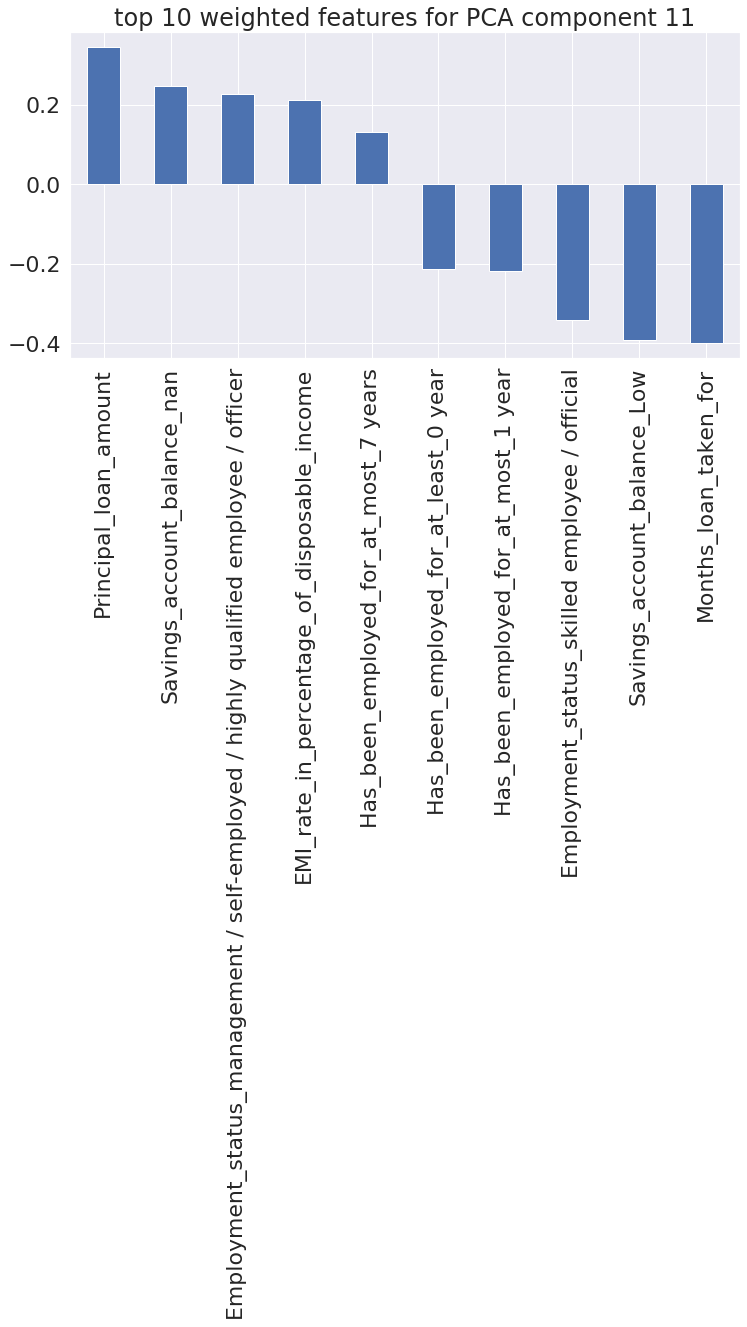

Principal_loan_amount                                                                 0.3458
Savings_account_balance_nan                                                           0.2482
Employment_status_management / self-employed / highly qualified employee / officer    0.2266
EMI_rate_in_percentage_of_disposable_income                                           0.2129
Has_been_employed_for_at_most_7 years                                                 0.1313
Has_been_employed_for_at_least_0 year                                                -0.2125
Has_been_employed_for_at_most_1 year                                                 -0.2172
Employment_status_skilled employee / official                                        -0.3424
Savings_account_balance_Low                                                          -0.3908
Months_loan_taken_for                                                                -0.4000
Name: 10, dtype: float64

In [58]:
pca_results(applicant_loan_v3,pca,11,5)

### PCA interpretation:
<a id='pca_interpret'></a>

We know that if two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.



Positively weighted features in 1st component:

    Principal_loan_amount                                  0.5279
    Months_loan_taken_for                                  0.4786
    Primary_applicant_age_in_years                         0.3399
    Years_at_current_residence                             0.2901
    Number_of_existing_loans_at_this_bank                  0.2452


Negatively weighted features in 1st component:

    Has_been_employed_for_at_most_4 years                 -0.0717
    Property_real estate                                  -0.0899
    Gender_female                                         -0.1184
    Marital_status_divorced/separated/married             -0.1184
    Loan_history_existing loans paid back duly till now   -0.1220


Positively weighted features in 2nd component:

    Principal_loan_amount                                  0.4542
    Months_loan_taken_for                                  0.4280
    Loan_history_existing loans paid back duly till now    0.1028
    Gender_female                                          0.0698
    Marital_status_divorced/separated/married              0.0698


Negatively weighted features in 2nd component:

    Number_of_dependents                                  -0.2206
    EMI_rate_in_percentage_of_disposable_income           -0.2445
    Years_at_current_residence                            -0.3003
    Number_of_existing_loans_at_this_bank                 -0.3194
    Primary_applicant_age_in_years                        -0.4352


Positively weighted features in 3rd component:

    Number_of_dependents                           0.5362
    Number_of_existing_loans_at_this_bank          0.2662
    Principal_loan_amount                          0.0756
    Employment_status_unskilled - resident         0.0711
    Gender_male                                    0.0662


Negatively weighted features in 3rd component:

    Has_been_employed_for_at_most_nan             -0.0863
    Has_been_employed_for_at_least_7 years        -0.0863
    Months_loan_taken_for                         -0.2427
    Years_at_current_residence                    -0.3294
    EMI_rate_in_percentage_of_disposable_income   -0.6175



Positively weighted features in 11th component:

    Principal_loan_amount                                                                 0.2884
    Savings_account_balance_nan                                                           0.2858
    Employment_status_management / self-employed / highly qualified employee / officer    0.1961
    EMI_rate_in_percentage_of_disposable_income                                           0.1910
    Property_car or other                                                                 0.1784

Negatively weighted features in 11th component:

    Has_been_employed_for_at_most_1 year                                                 -0.1748
    Purpose_electronic equipment                                                         -0.1848
    Property_real estate                                                                 -0.3089
    Months_loan_taken_for                                                                -0.4202
    Savings_account_balance_Low                                                          -0.4570



## Clustering
<a id='cluster'></a>

In [59]:
%%time
def kmeans_score(data, no_clusters):
    
    km = KMeans(n_clusters=no_clusters, max_iter=25) 
    model = km.fit(data)
    score = np.abs(model.score(data))
    
    return score

no_clusters = 20
scores = []
centers= []

# Over a number of different cluster counts...
# run k-means clustering on the data and...
# compute the average within-cluster distances
for i in range(2,no_clusters,5):
    centers.append(i)
    score = kmeans_score(applicant_loan_pca, i)
    print(score)
    scores.append(score)


11137.763021268689
8309.67425312012
7448.264529319574
6917.313421227928
CPU times: user 4 s, sys: 4.59 s, total: 8.59 s
Wall time: 800 ms


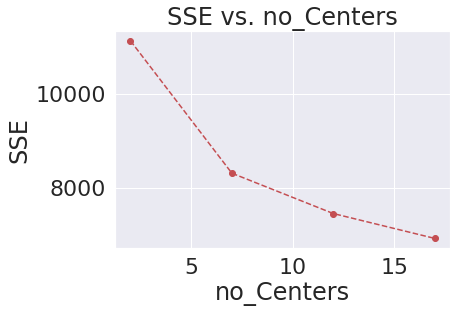

In [60]:
#Investigate the change in within-cluster distance across number of clusters.
# elbow method to see how many clusters are best. For that we need to plot 
# sum of squared euclidean distance which we get from .score function in kmeans vs no_clusters
plt.plot(centers, scores, linestyle='--', marker='o', color='r');
plt.xlabel('no_Centers');
plt.ylabel('SSE');
plt.title('SSE vs. no_Centers');

In [61]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.

k = 7
model = KMeans(k, random_state=1234, max_iter=25, n_jobs=-1).fit(applicant_loan_pca)
applicant_loan_clustered = model.predict(applicant_loan_pca)

## 3. Which of these segments / sub-segments would you propose be approved?

In [62]:
set(applicant_loan_clustered.tolist())

{0, 1, 2, 3, 4, 5, 6}

In [63]:
cluster_indexing = [[n for n,i in enumerate(applicant_loan_clustered) if i == j] for j in [0, 1, 2, 3, 4, 5, 6]]

In [64]:
[print("Length of cluster {} : {}".format(i,len(cluster_indexing[i]))) for i in [0,1,2,3,4,5,6]]

Length of cluster 0 : 121
Length of cluster 1 : 154
Length of cluster 2 : 177
Length of cluster 3 : 135
Length of cluster 4 : 118
Length of cluster 5 : 120
Length of cluster 6 : 175


[None, None, None, None, None, None, None]

### Here we will try to find out what data points each of the clusters represent
<a id='clusterexplain'></a>
As discussed in [this](#graph_explain) above cell, we know what value in a feature an applicant should have in order to make them more credible and hence get approved for a loan. And from the [this](#pca_interpret) discussion regarding assigning weights to features, we also have an idea which feature is more important and which is less important. 

And from the above knowledge, we can better interpret these graphs below and choose which customer segment/ cluster gets approved for a loan.

In this section below i have plotted bar plots for categorical data and box plots for numerical data. 

The bar plots are plotted for each feature where each bar represents each category in that feature. The bars do not just represent the count of the value in that category as any dominating category would be over represented in each cluster. So instead I decided to plot a ratio denoted as follows:

**(Count of the category in that cluster)/ (total count of the category in the dataset)**

['Marital_status', 'Housing', 'Employment_status', 'Savings_account_balance', 'Purpose', 'Property', 'Loan_history', 'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most', 'Foreign_worker', 'Has_coapplicant', 'Has_guarantor', 'Gender']


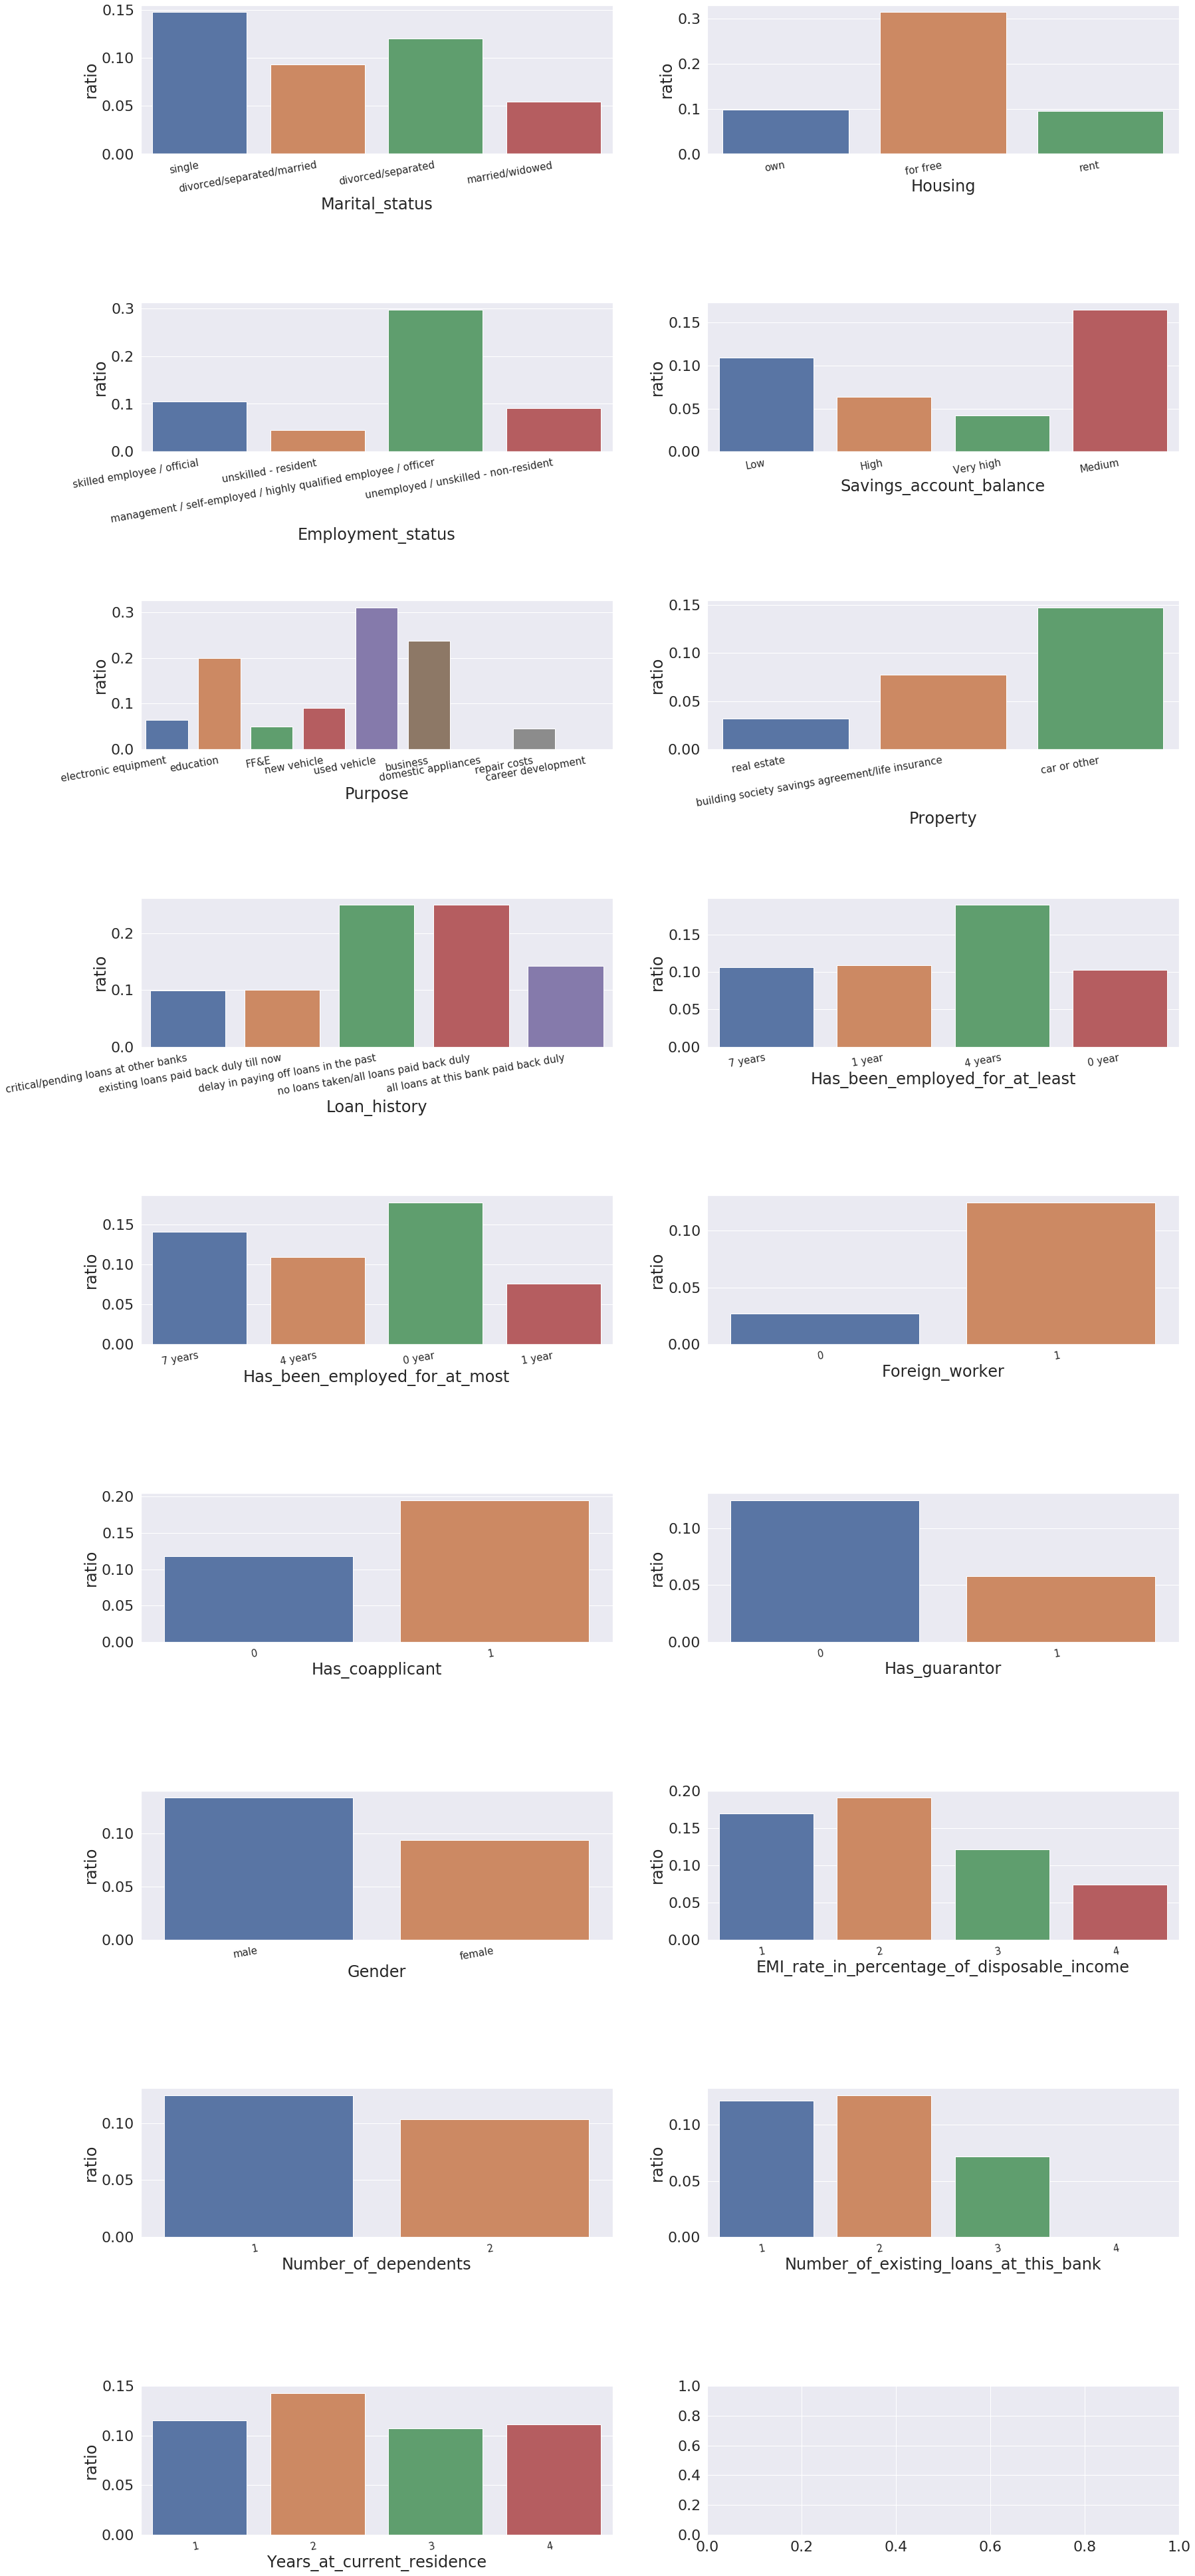

In [65]:
ratio_plotter(applicant_loan_v1.loc[cluster_indexing[0],:], features, cluster = True)

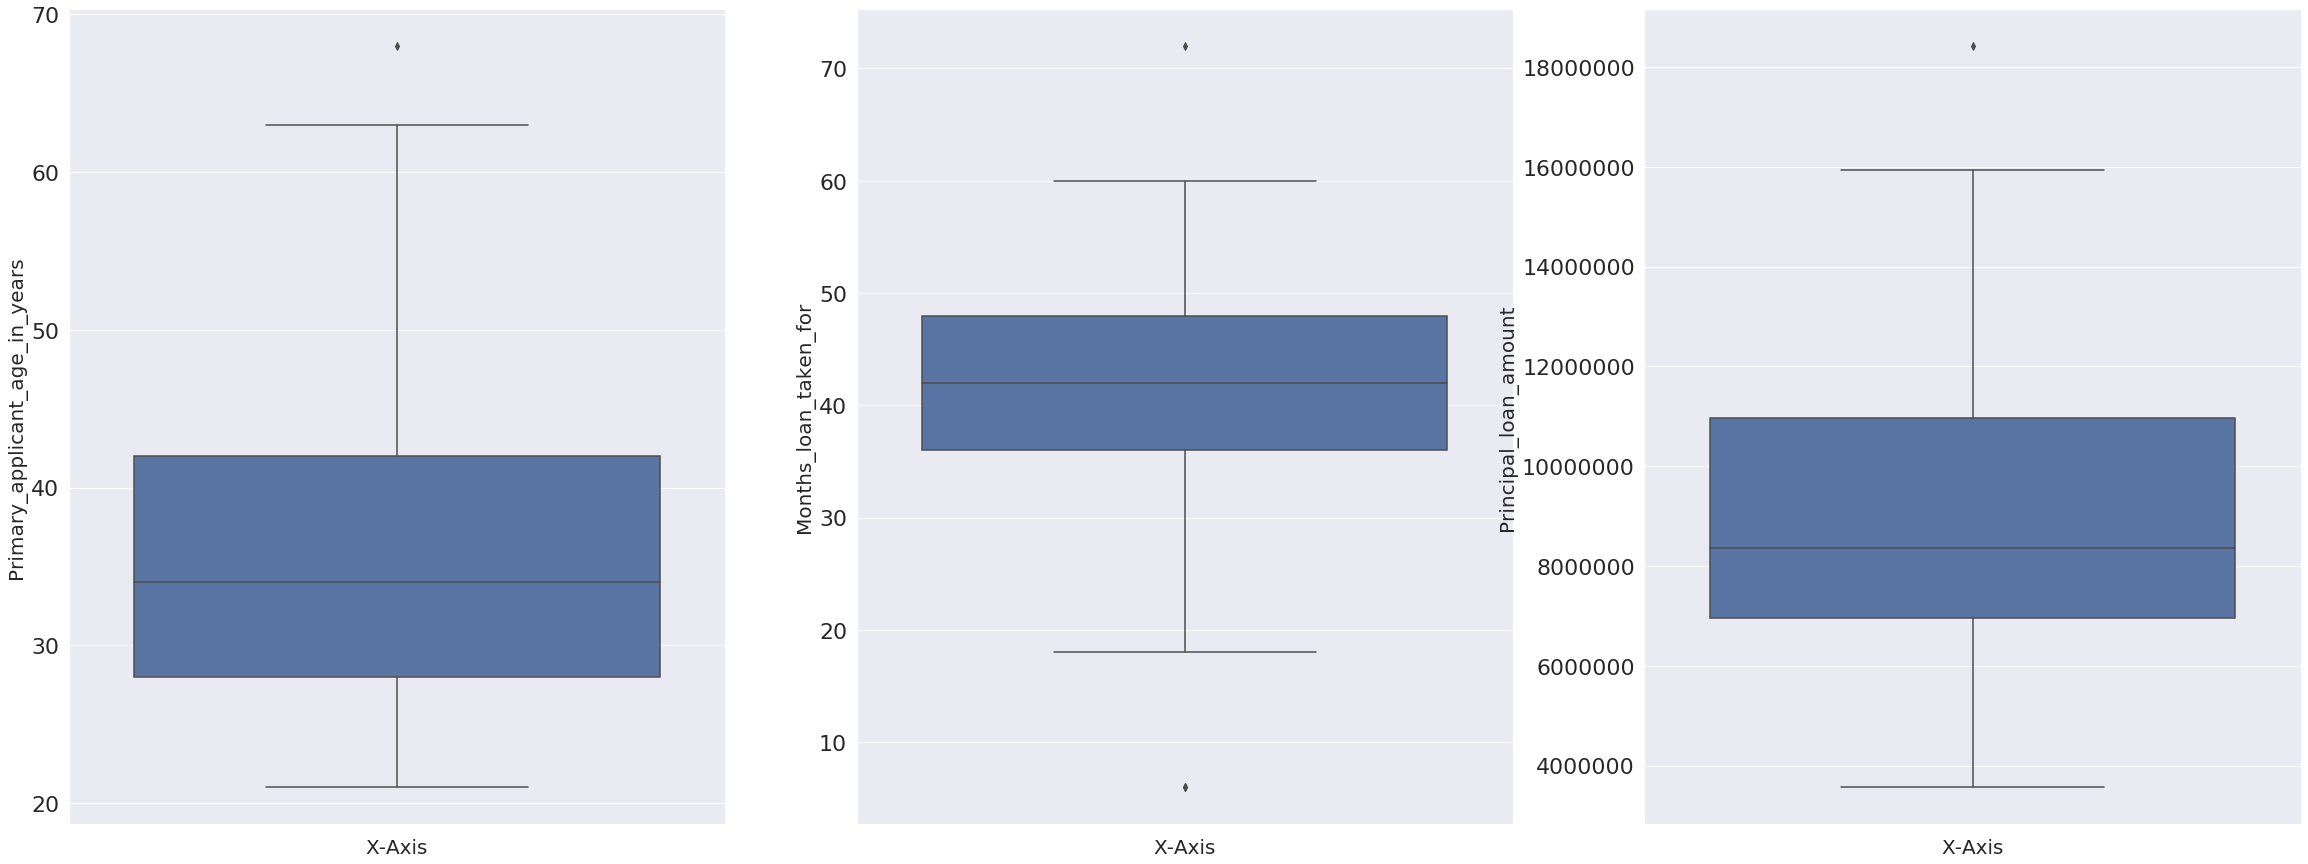

In [67]:
boxplotter(applicant_loan_v1.loc[cluster_indexing[0],:],xaxis=False)

['Marital_status', 'Housing', 'Employment_status', 'Savings_account_balance', 'Purpose', 'Property', 'Loan_history', 'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most', 'Foreign_worker', 'Has_coapplicant', 'Has_guarantor', 'Gender']


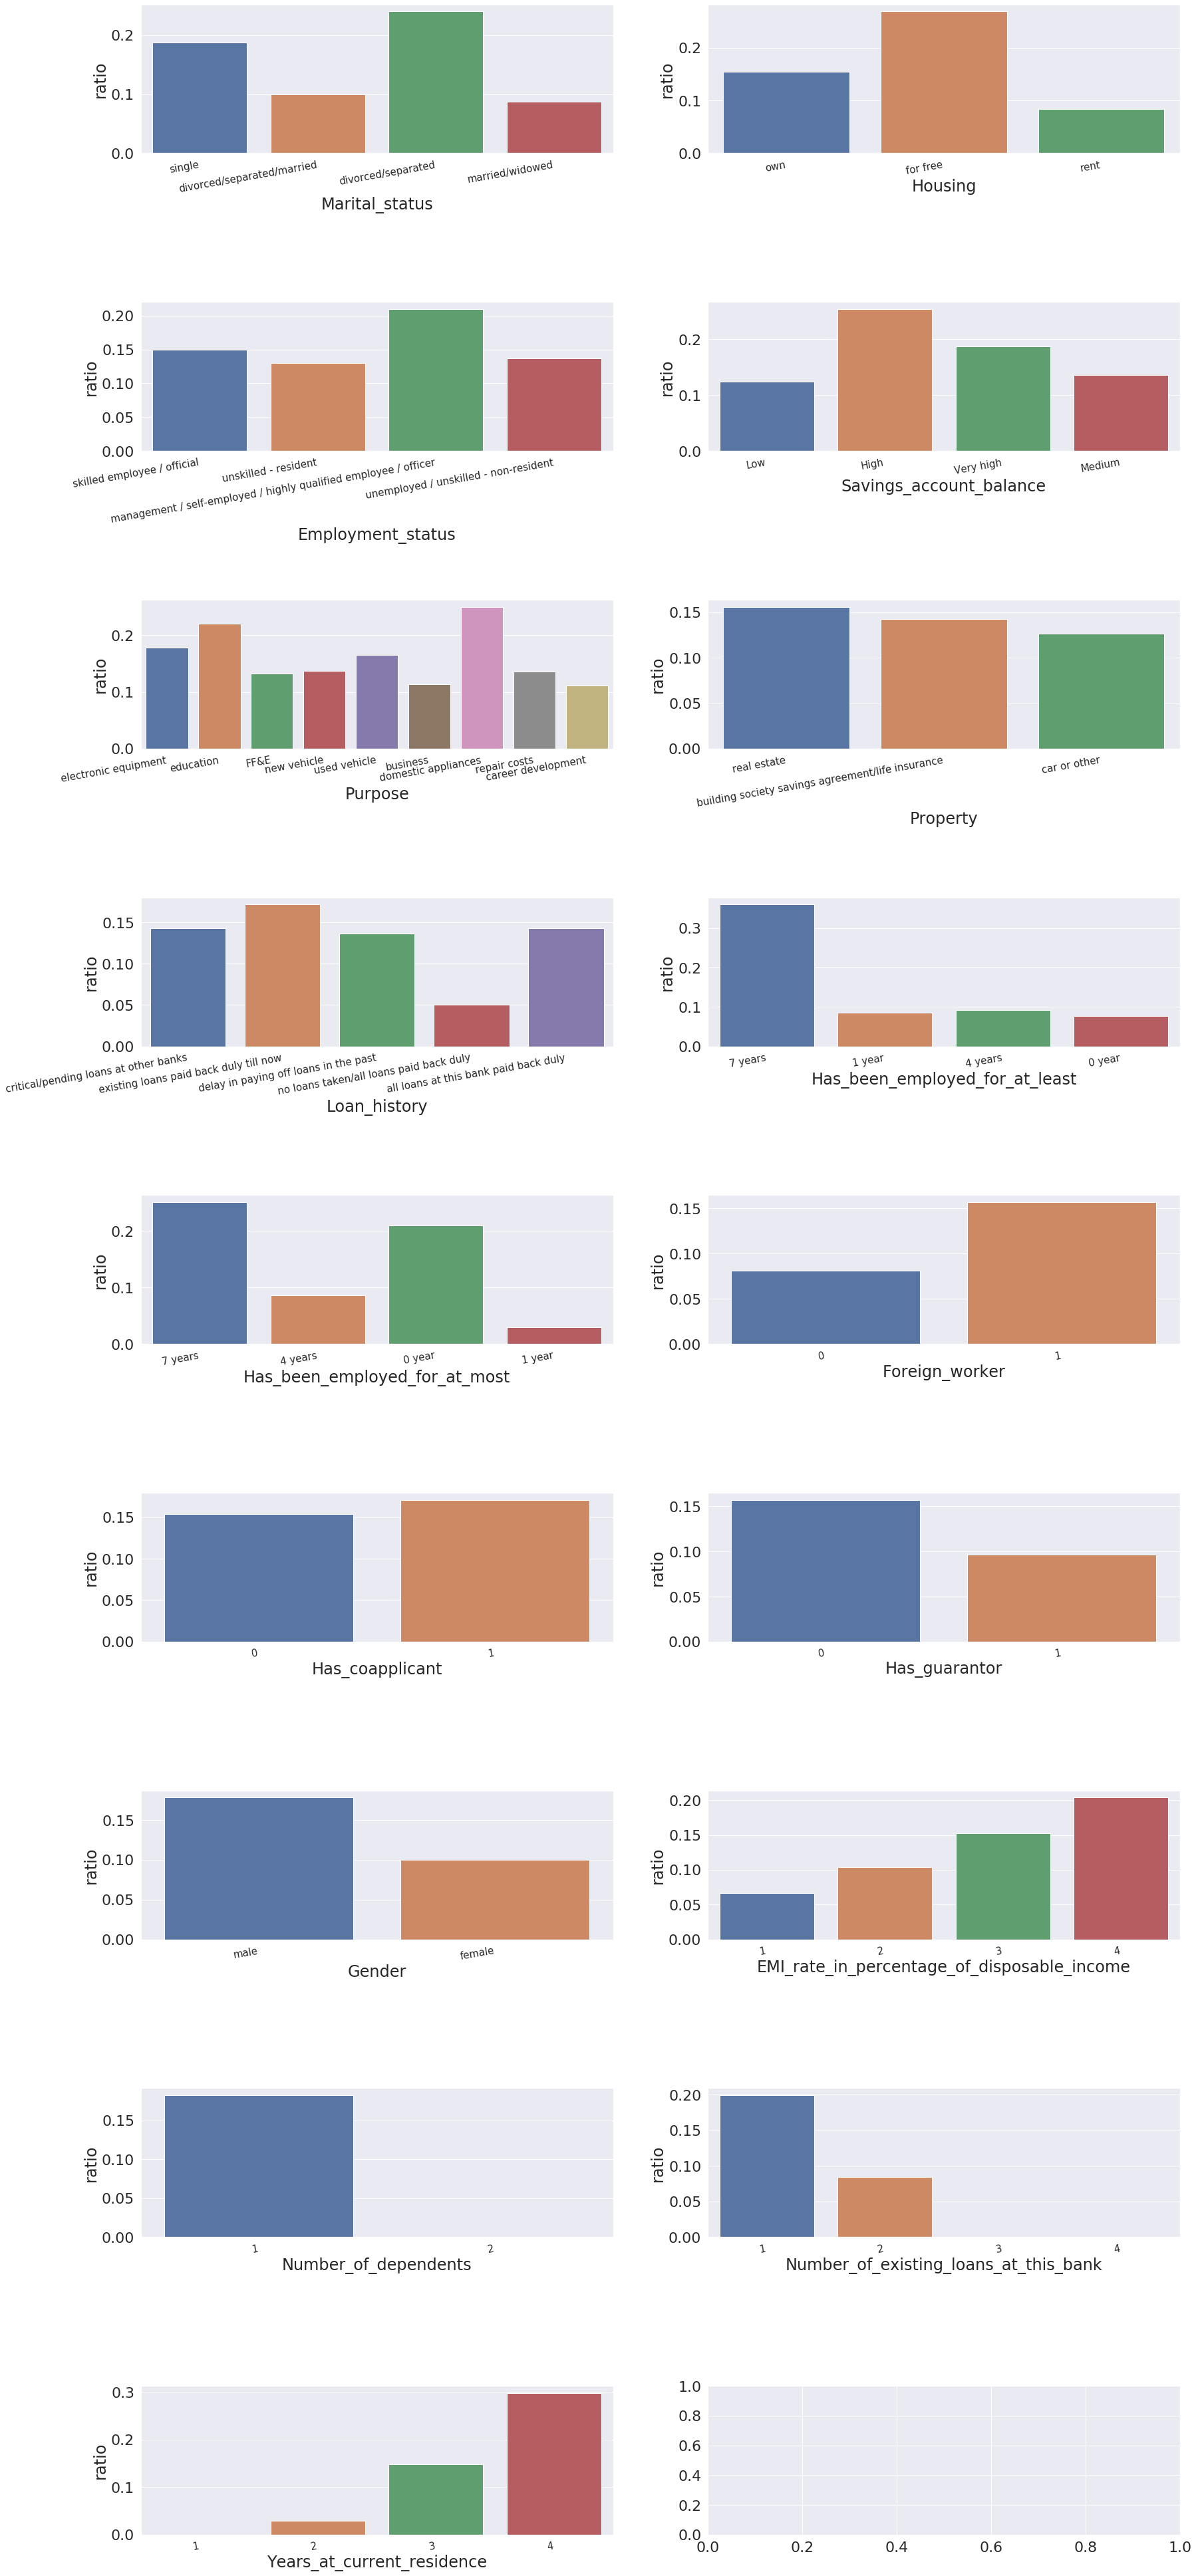

In [80]:
ratio_plotter(applicant_loan_v1.loc[cluster_indexing[1],:], features, cluster = True)

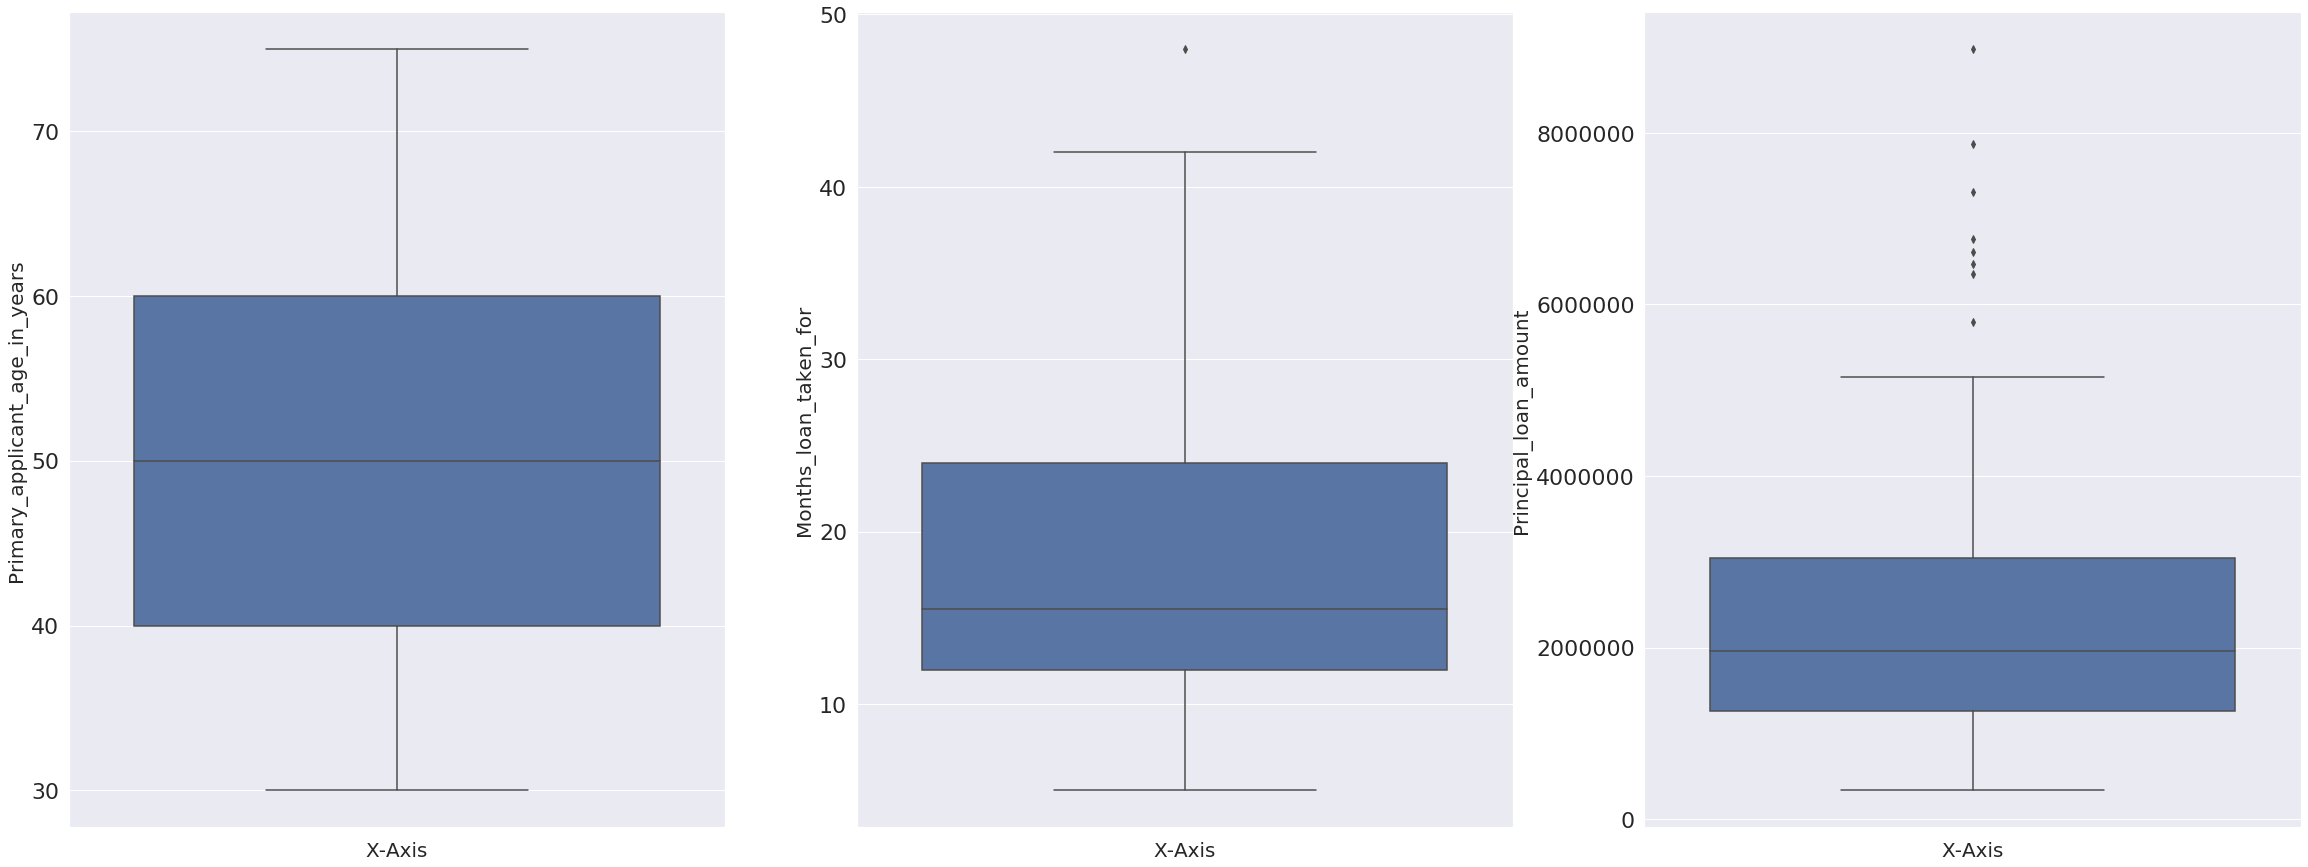

In [69]:
boxplotter(applicant_loan_v1.loc[cluster_indexing[1],:],xaxis=False)

['Marital_status', 'Housing', 'Employment_status', 'Savings_account_balance', 'Purpose', 'Property', 'Loan_history', 'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most', 'Foreign_worker', 'Has_coapplicant', 'Has_guarantor', 'Gender']


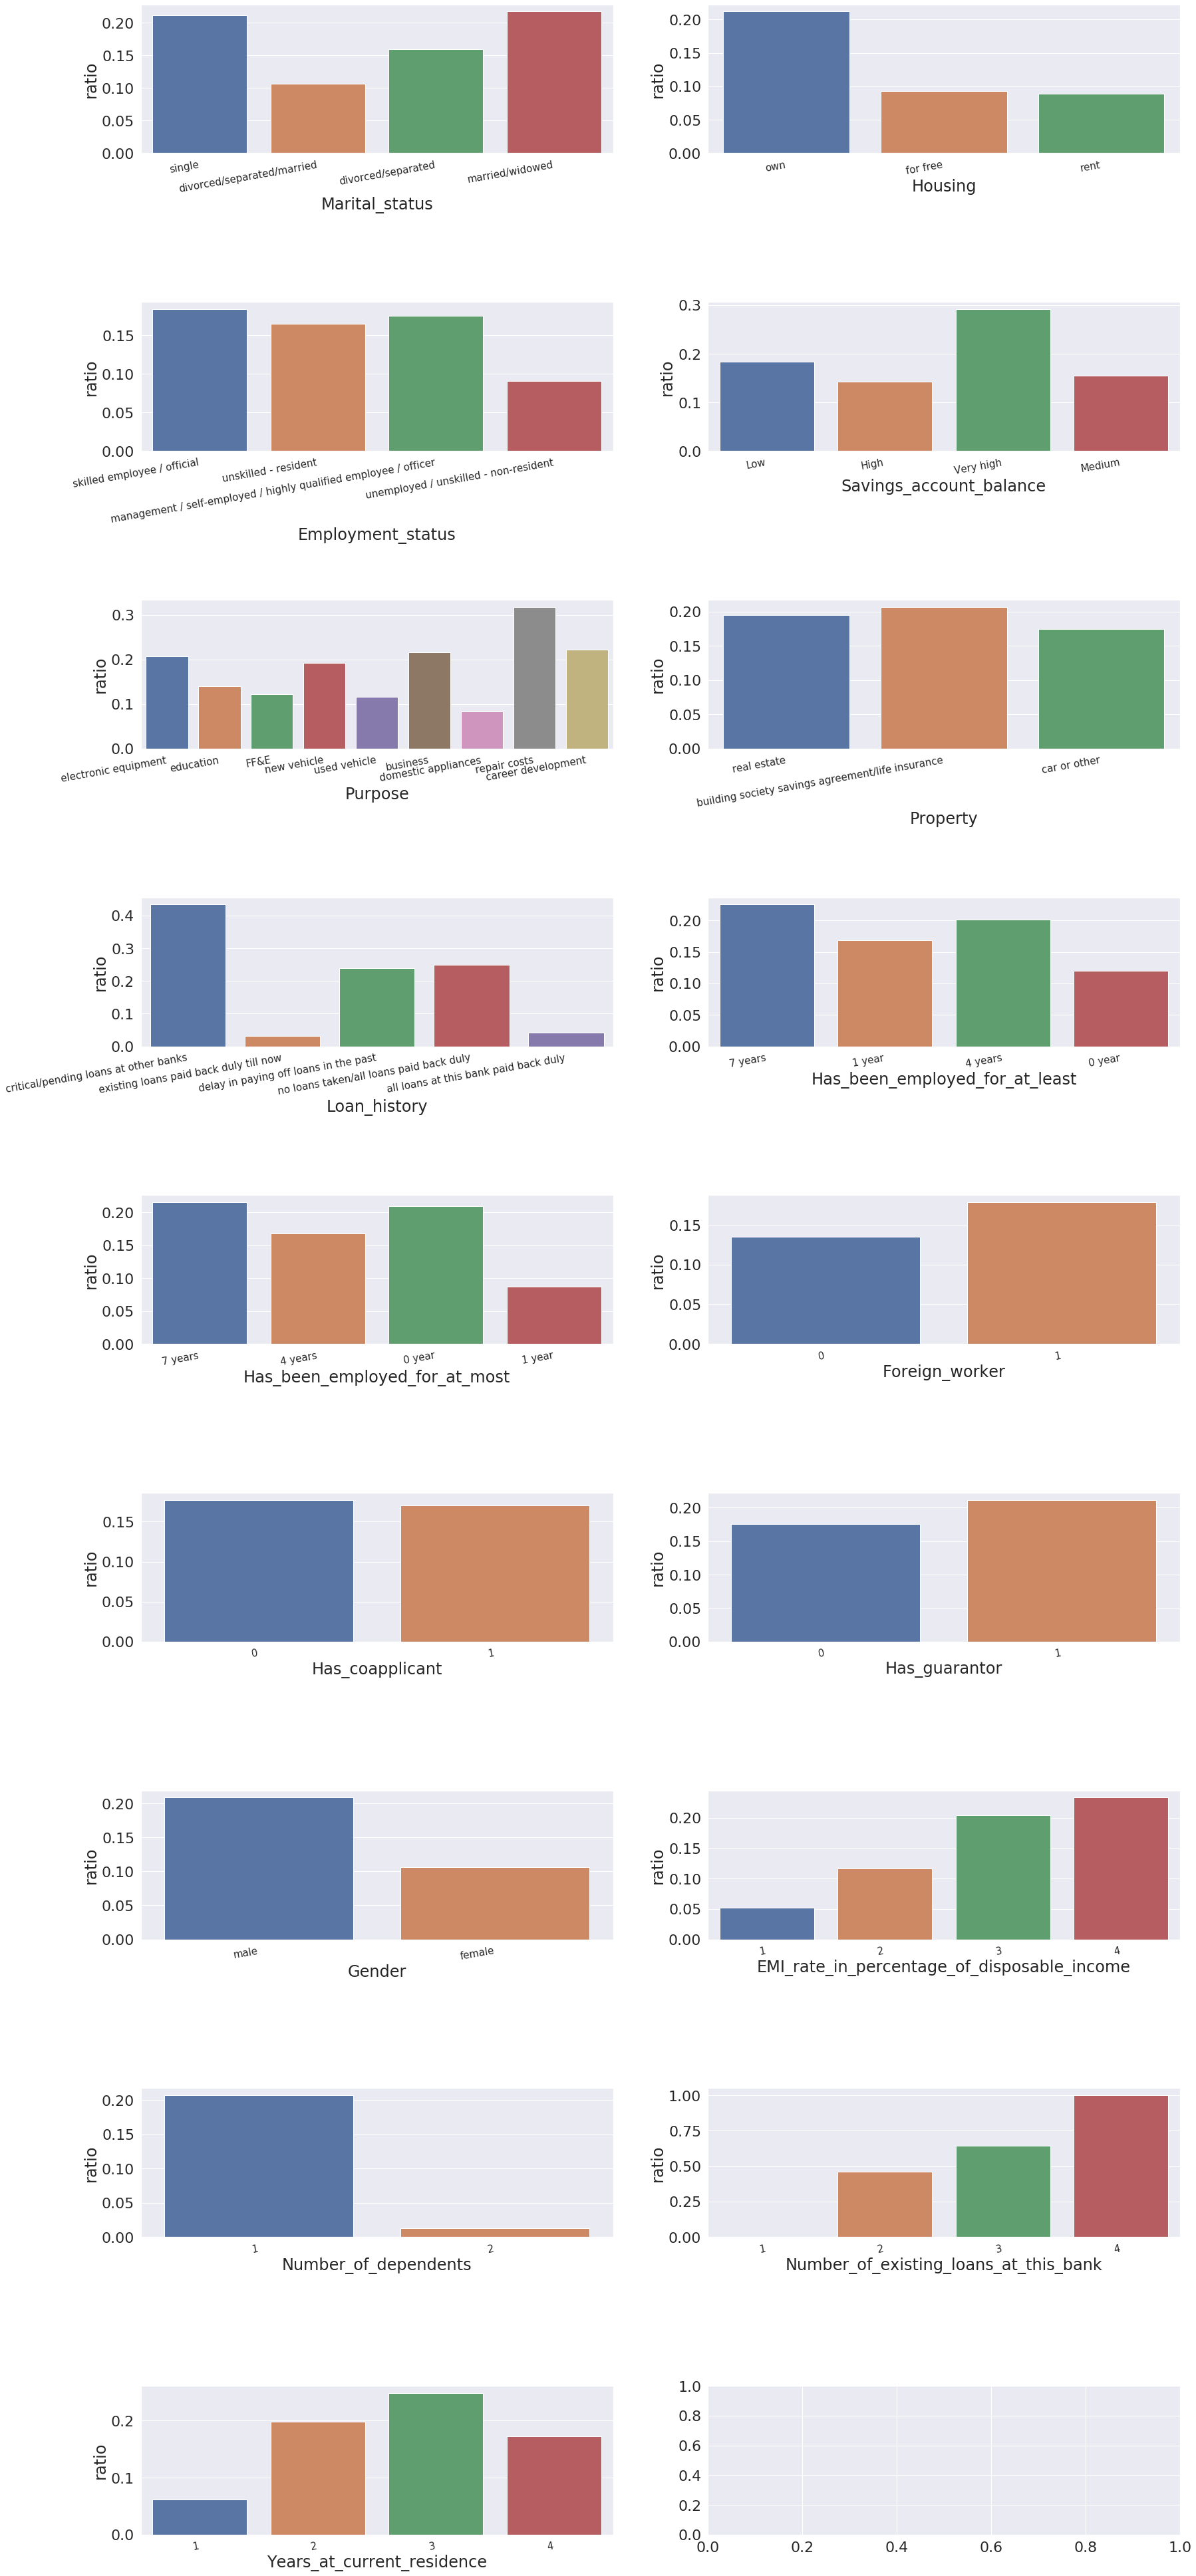

In [81]:
ratio_plotter(applicant_loan_v1.loc[cluster_indexing[2],:], features, cluster = True)

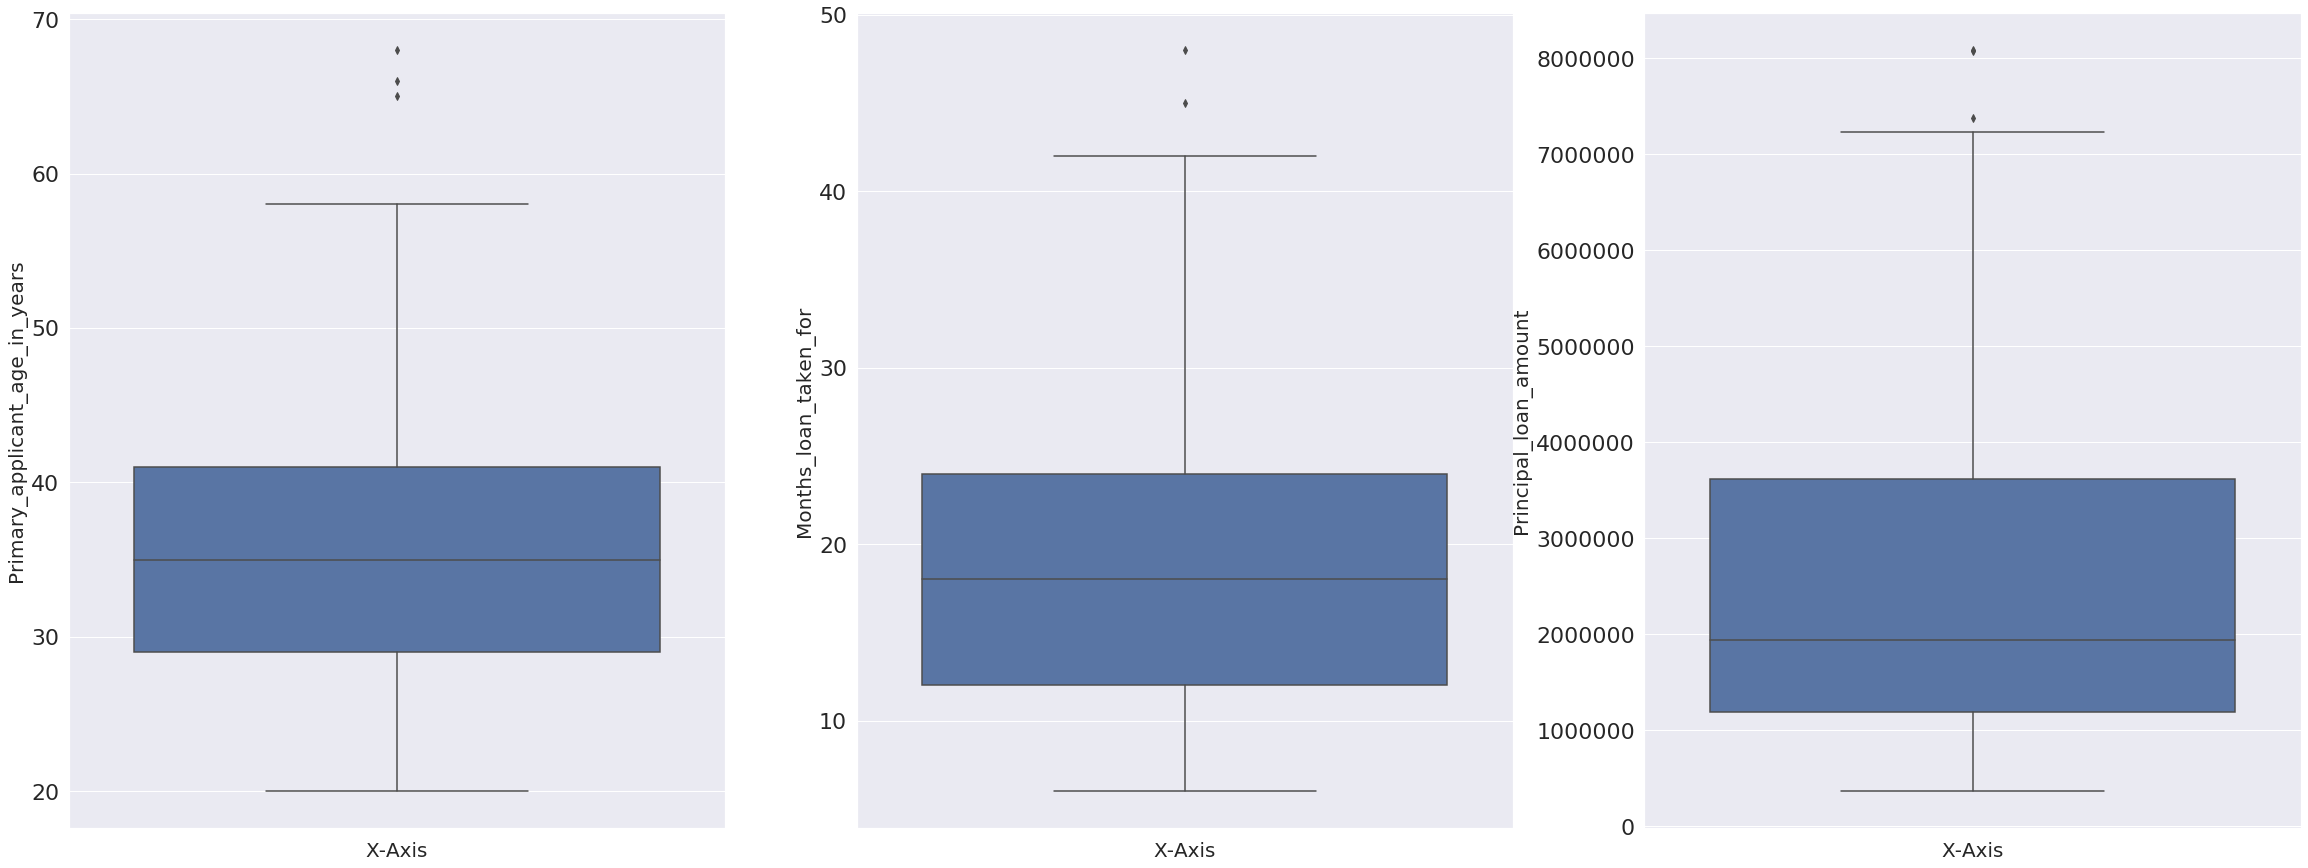

In [71]:
boxplotter(applicant_loan_v1.loc[cluster_indexing[2],:],xaxis=False)

['Marital_status', 'Housing', 'Employment_status', 'Savings_account_balance', 'Purpose', 'Property', 'Loan_history', 'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most', 'Foreign_worker', 'Has_coapplicant', 'Has_guarantor', 'Gender']


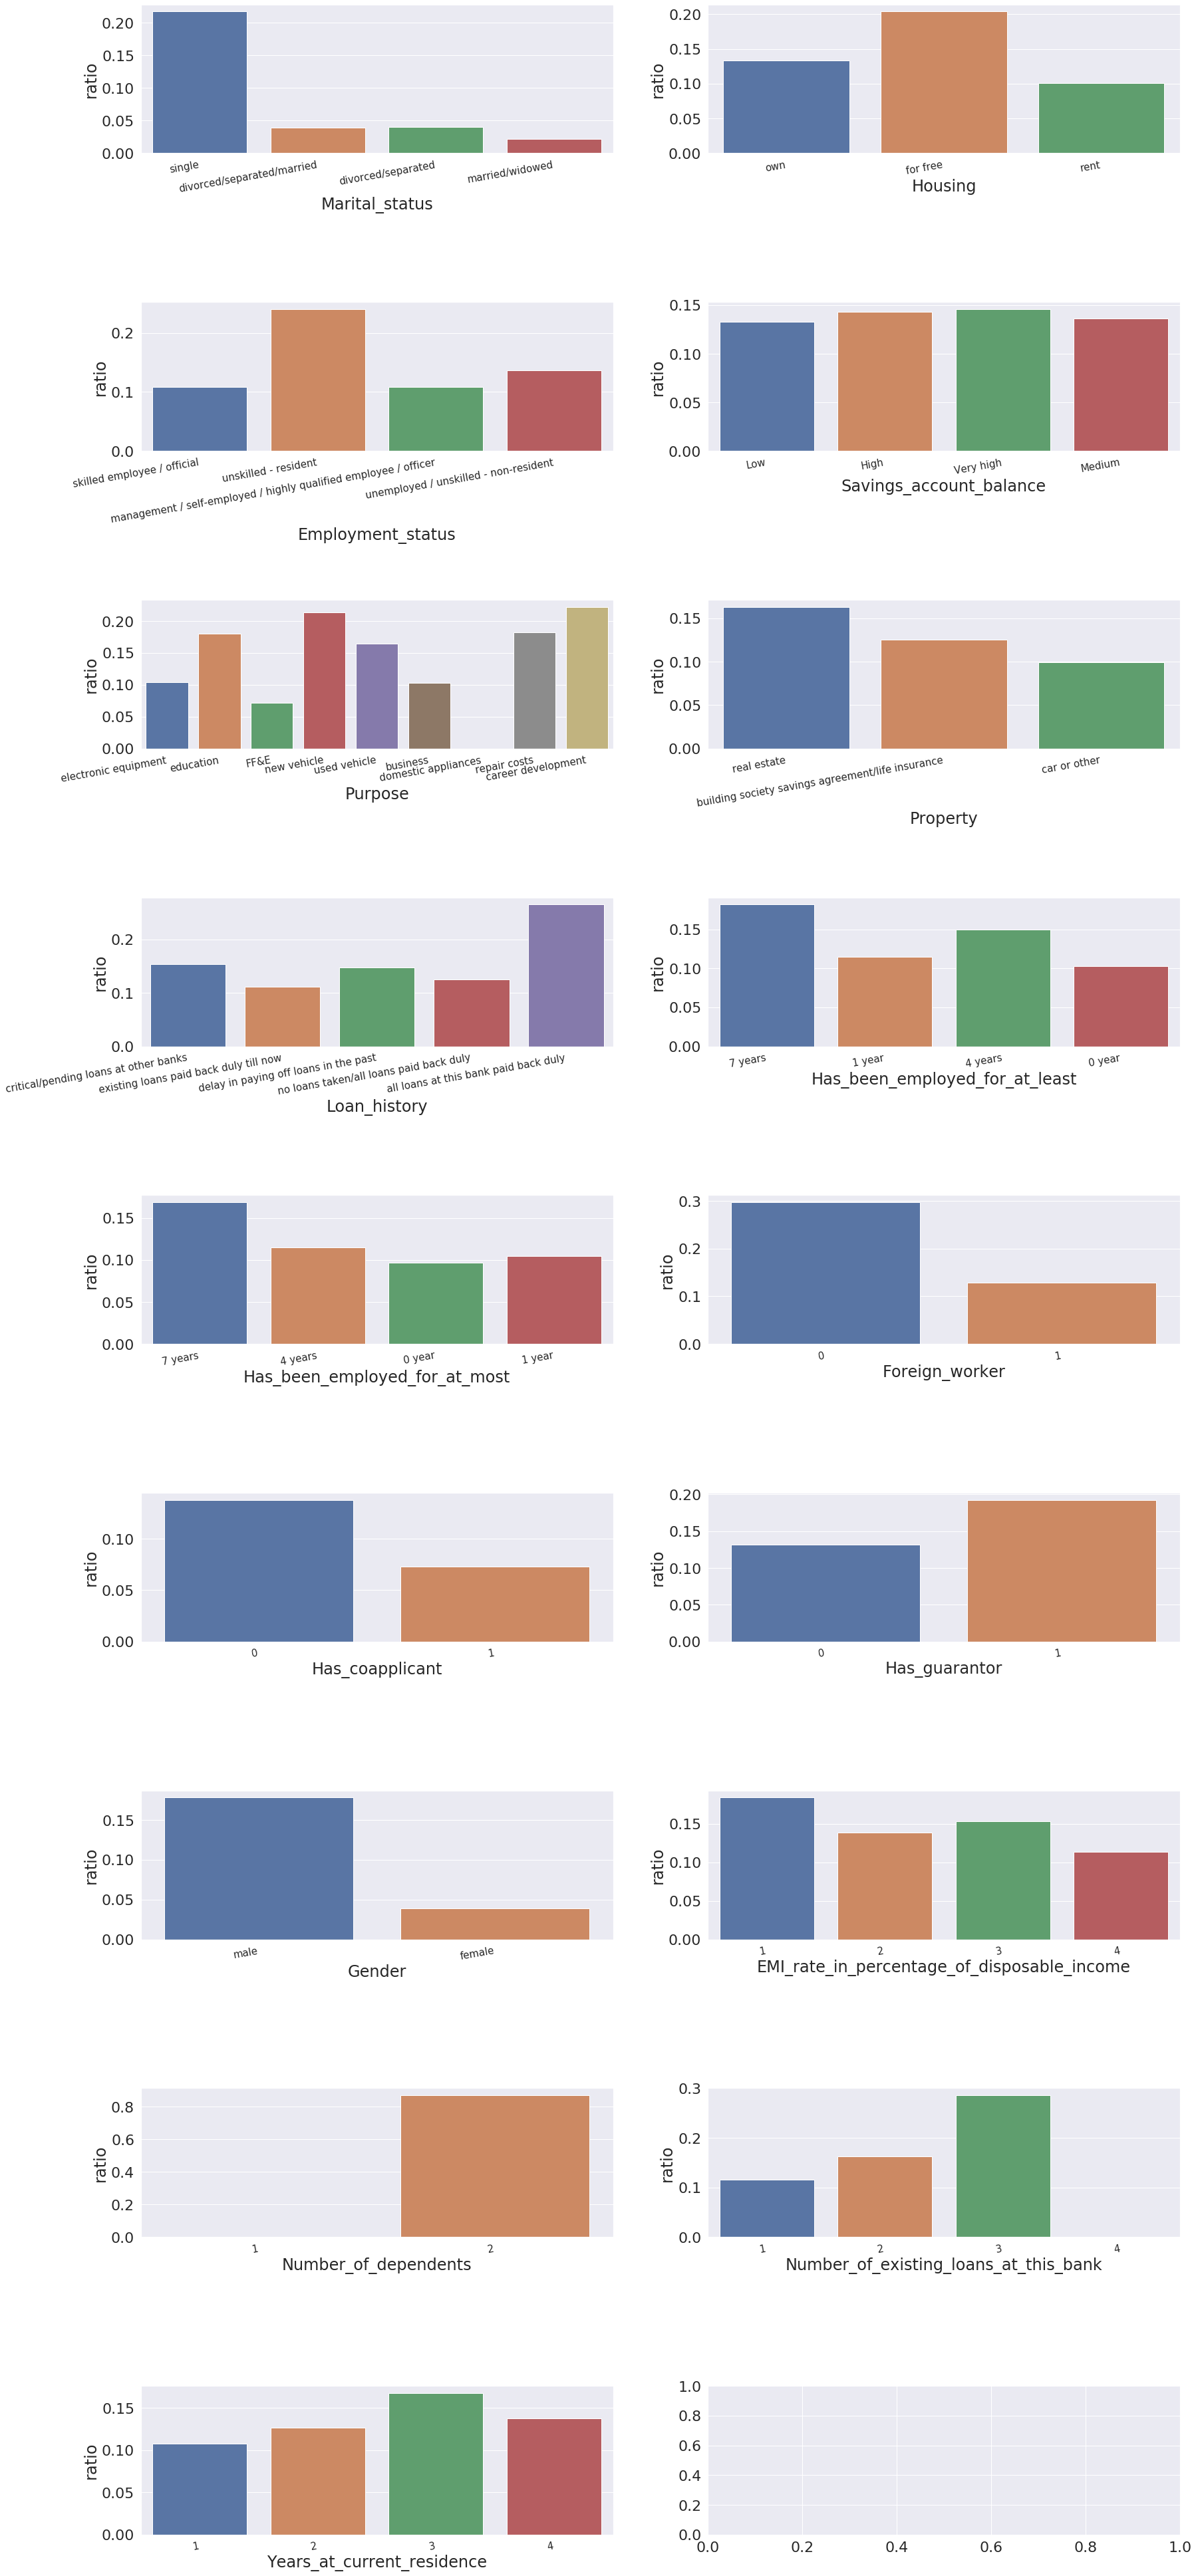

In [82]:
ratio_plotter(applicant_loan_v1.loc[cluster_indexing[3],:], features, cluster = True)

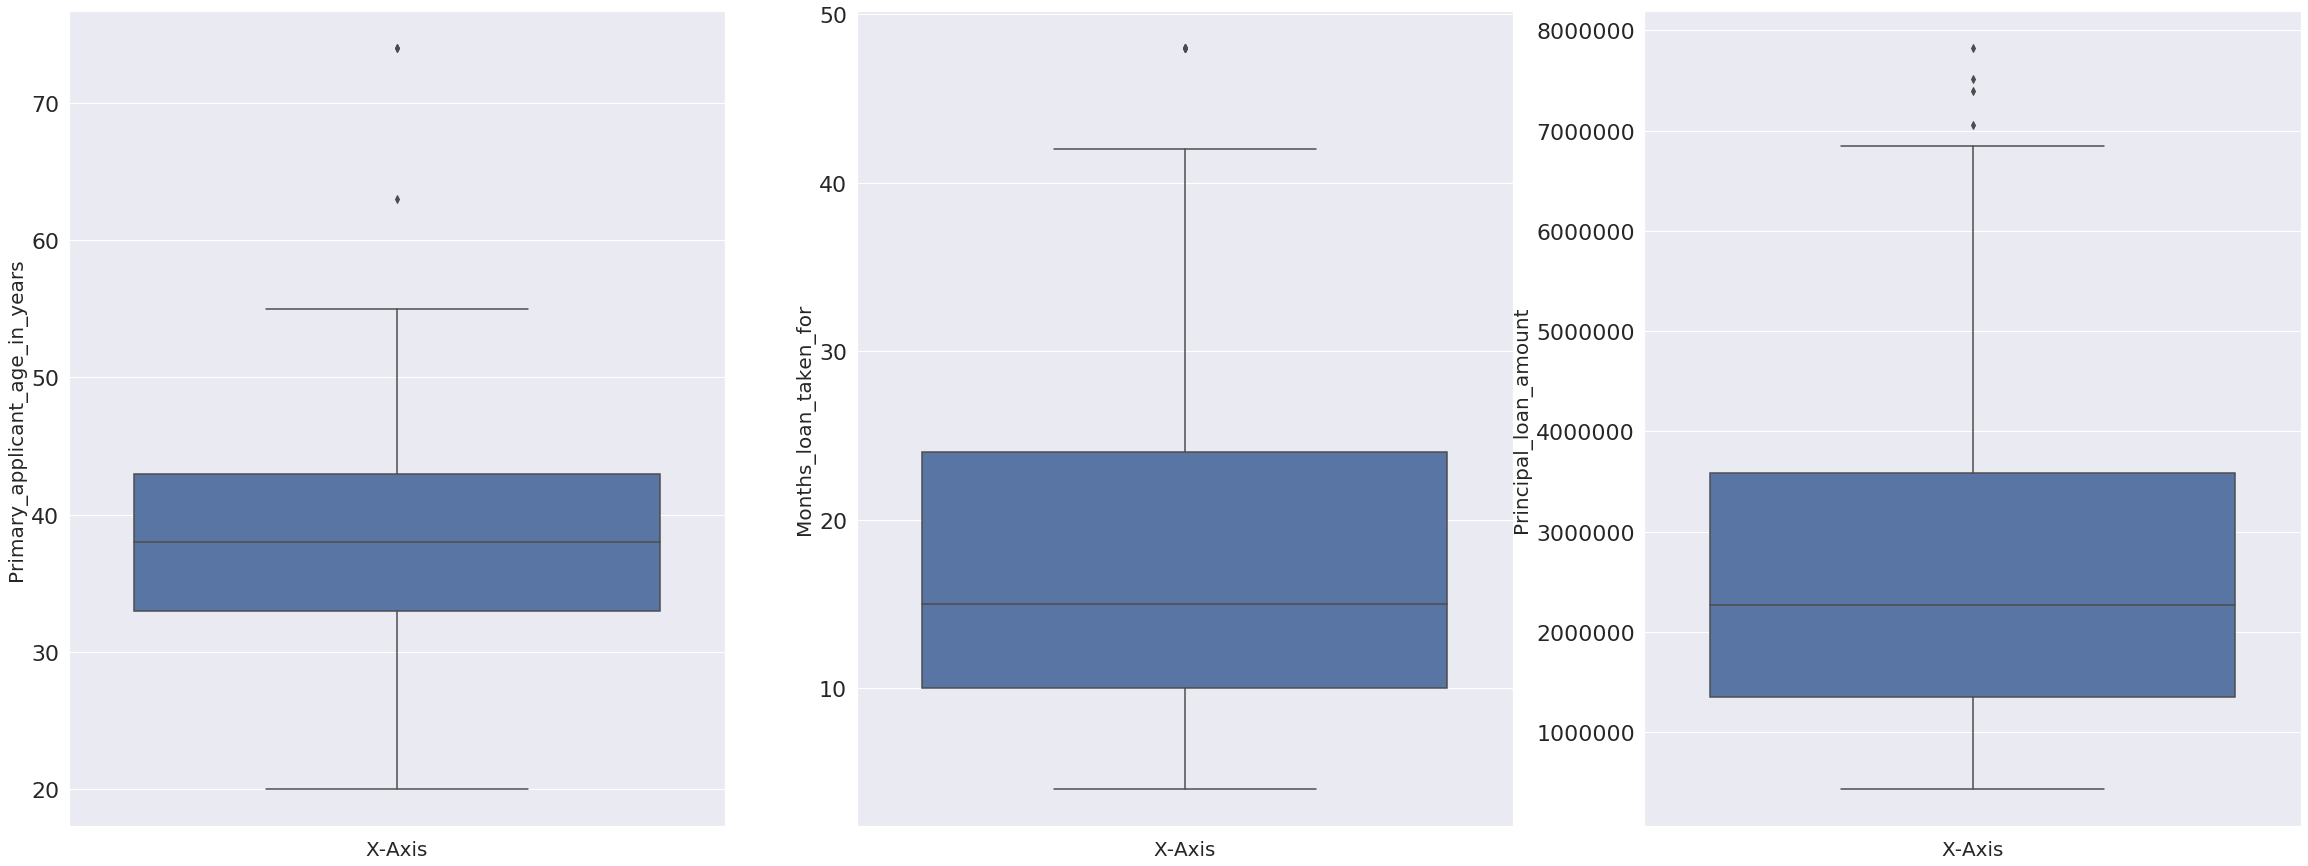

In [73]:
boxplotter(applicant_loan_v1.loc[cluster_indexing[3],:],xaxis=False)

['Marital_status', 'Housing', 'Employment_status', 'Savings_account_balance', 'Purpose', 'Property', 'Loan_history', 'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most', 'Foreign_worker', 'Has_coapplicant', 'Has_guarantor', 'Gender']


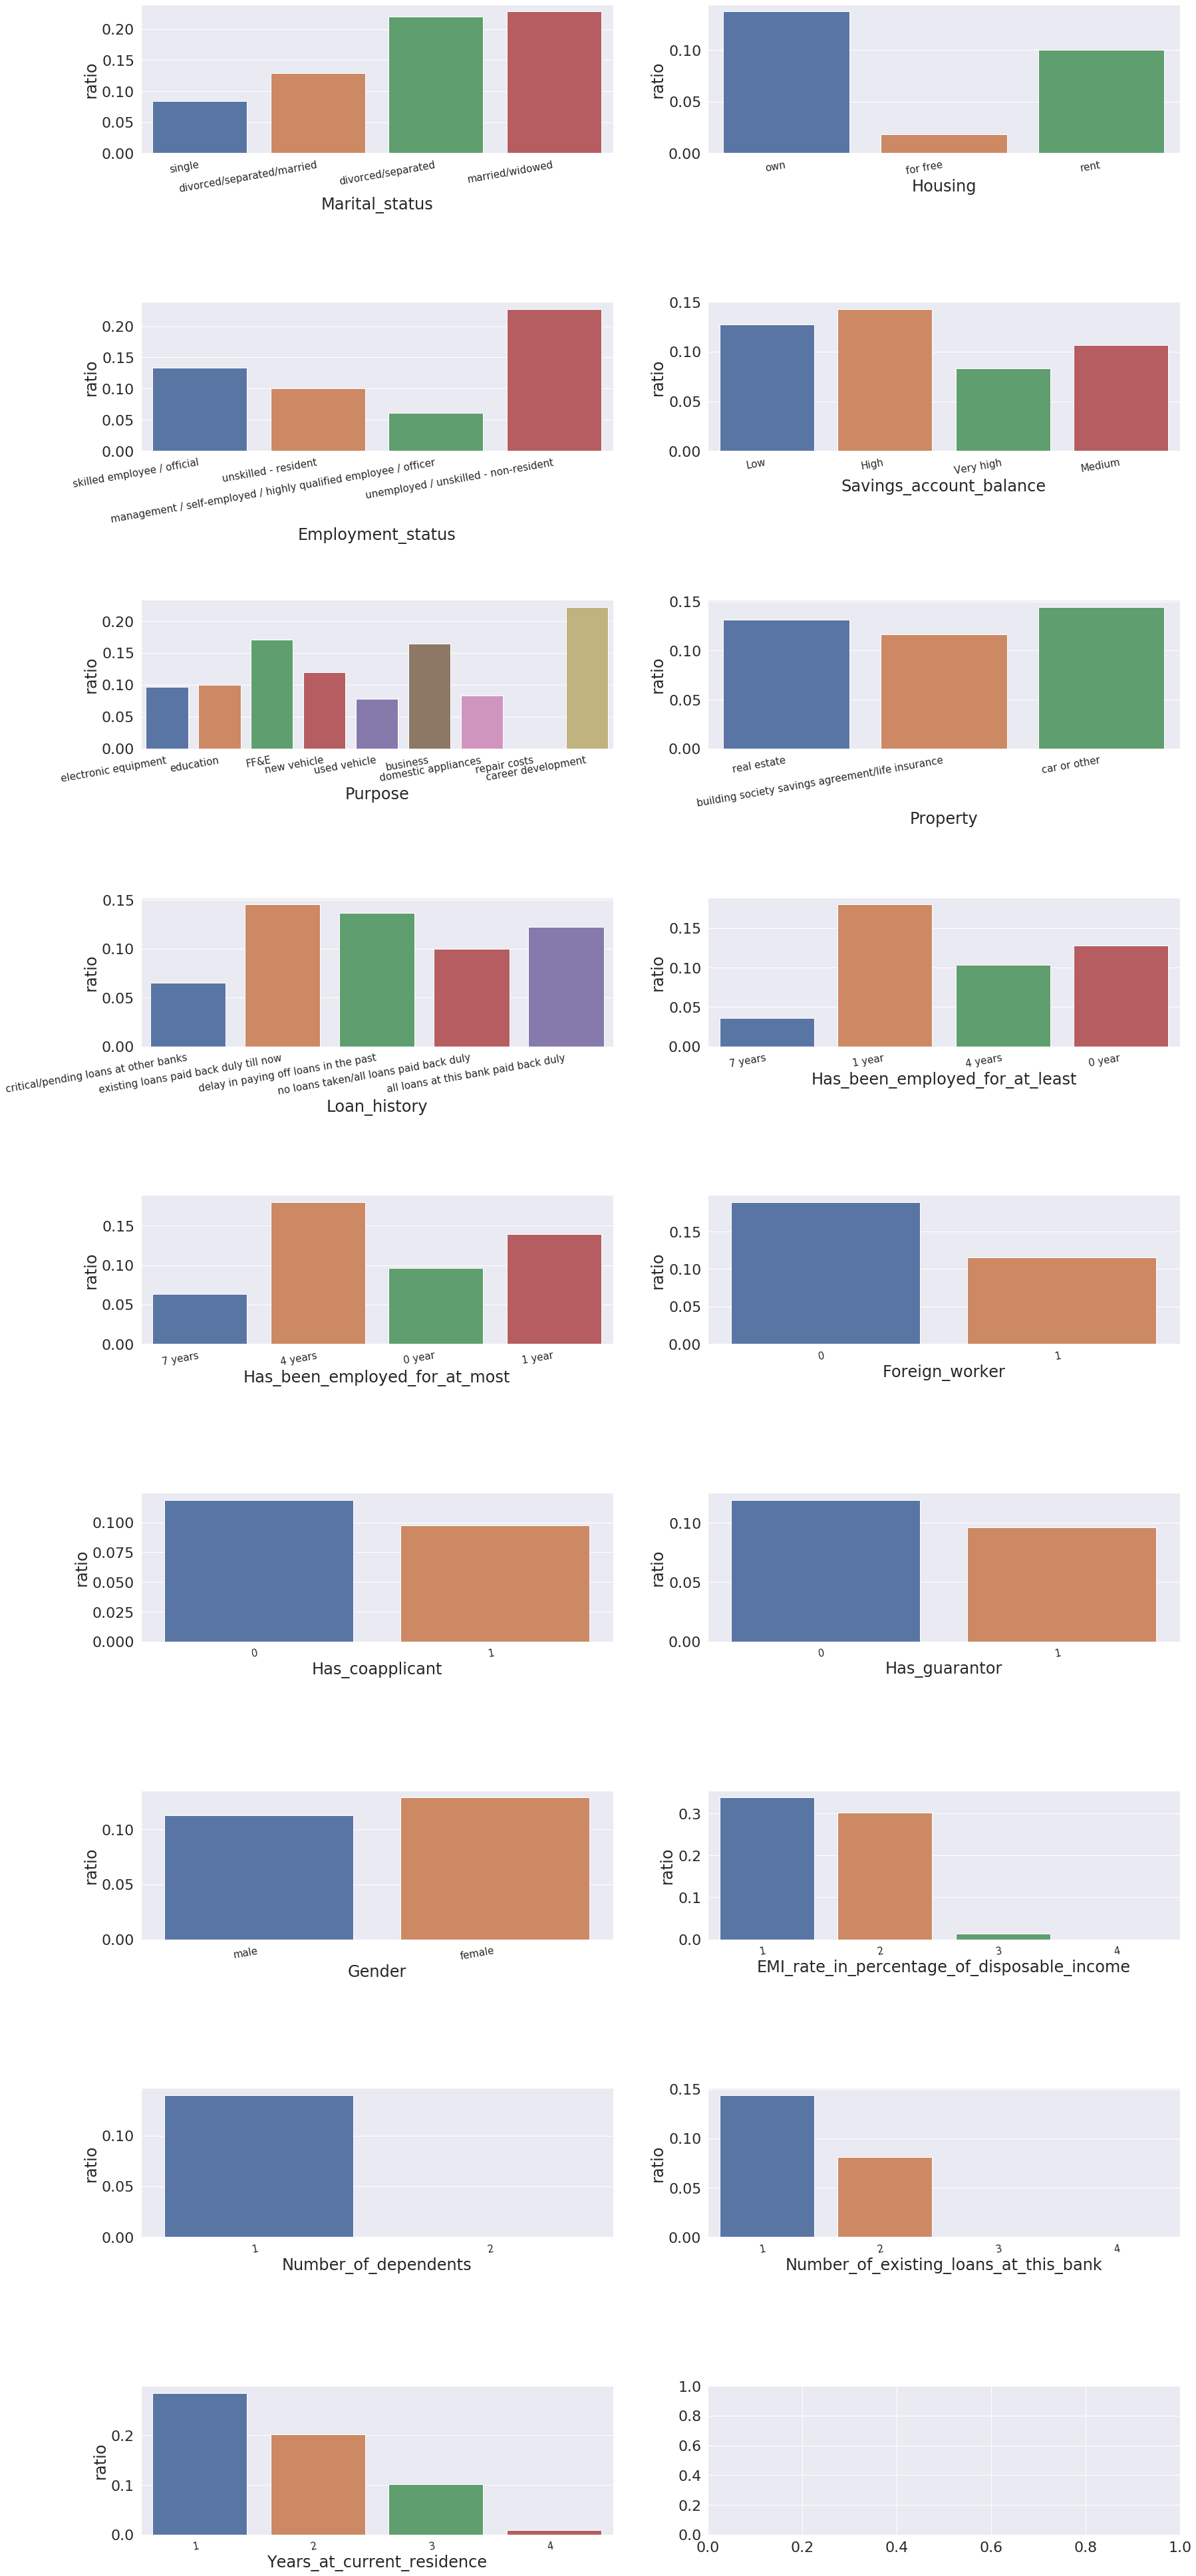

In [83]:
ratio_plotter(applicant_loan_v1.loc[cluster_indexing[4],:], features, cluster = True)

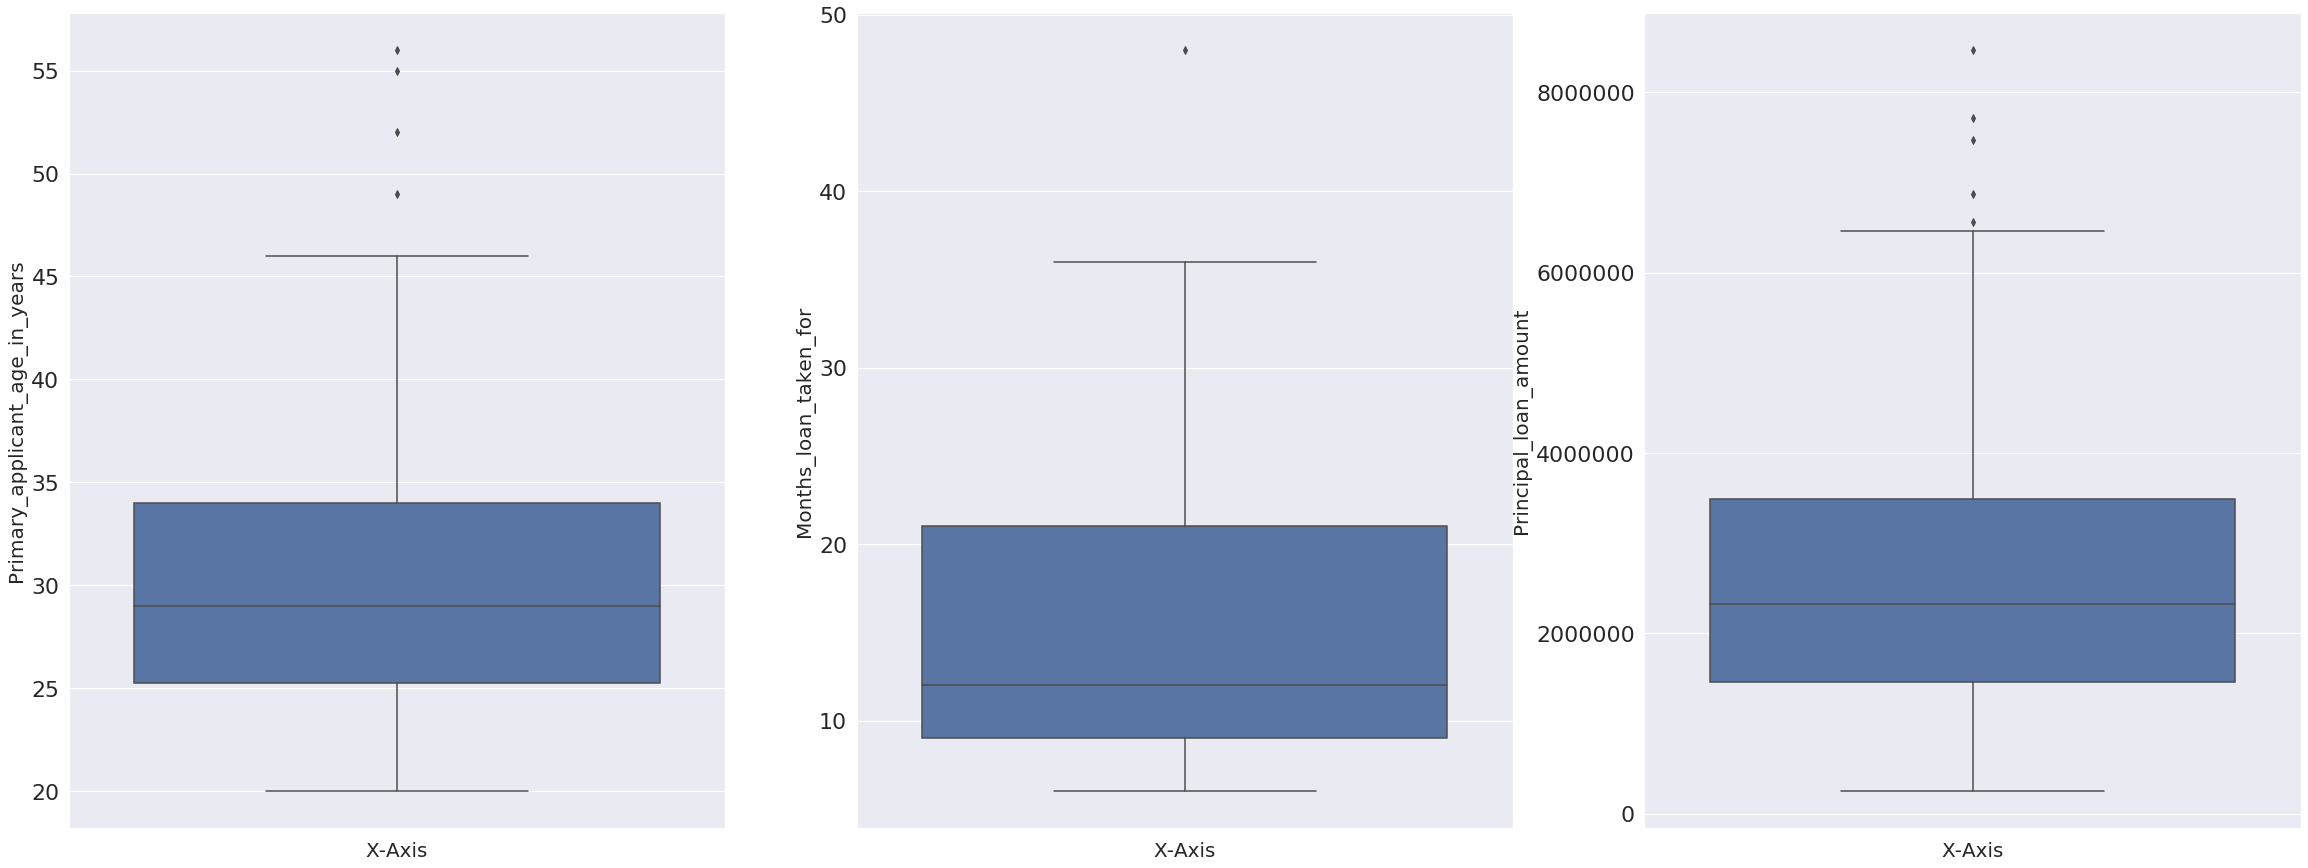

In [75]:
boxplotter(applicant_loan_v1.loc[cluster_indexing[4],:],xaxis=False)

['Marital_status', 'Housing', 'Employment_status', 'Savings_account_balance', 'Purpose', 'Property', 'Loan_history', 'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most', 'Foreign_worker', 'Has_coapplicant', 'Has_guarantor', 'Gender']


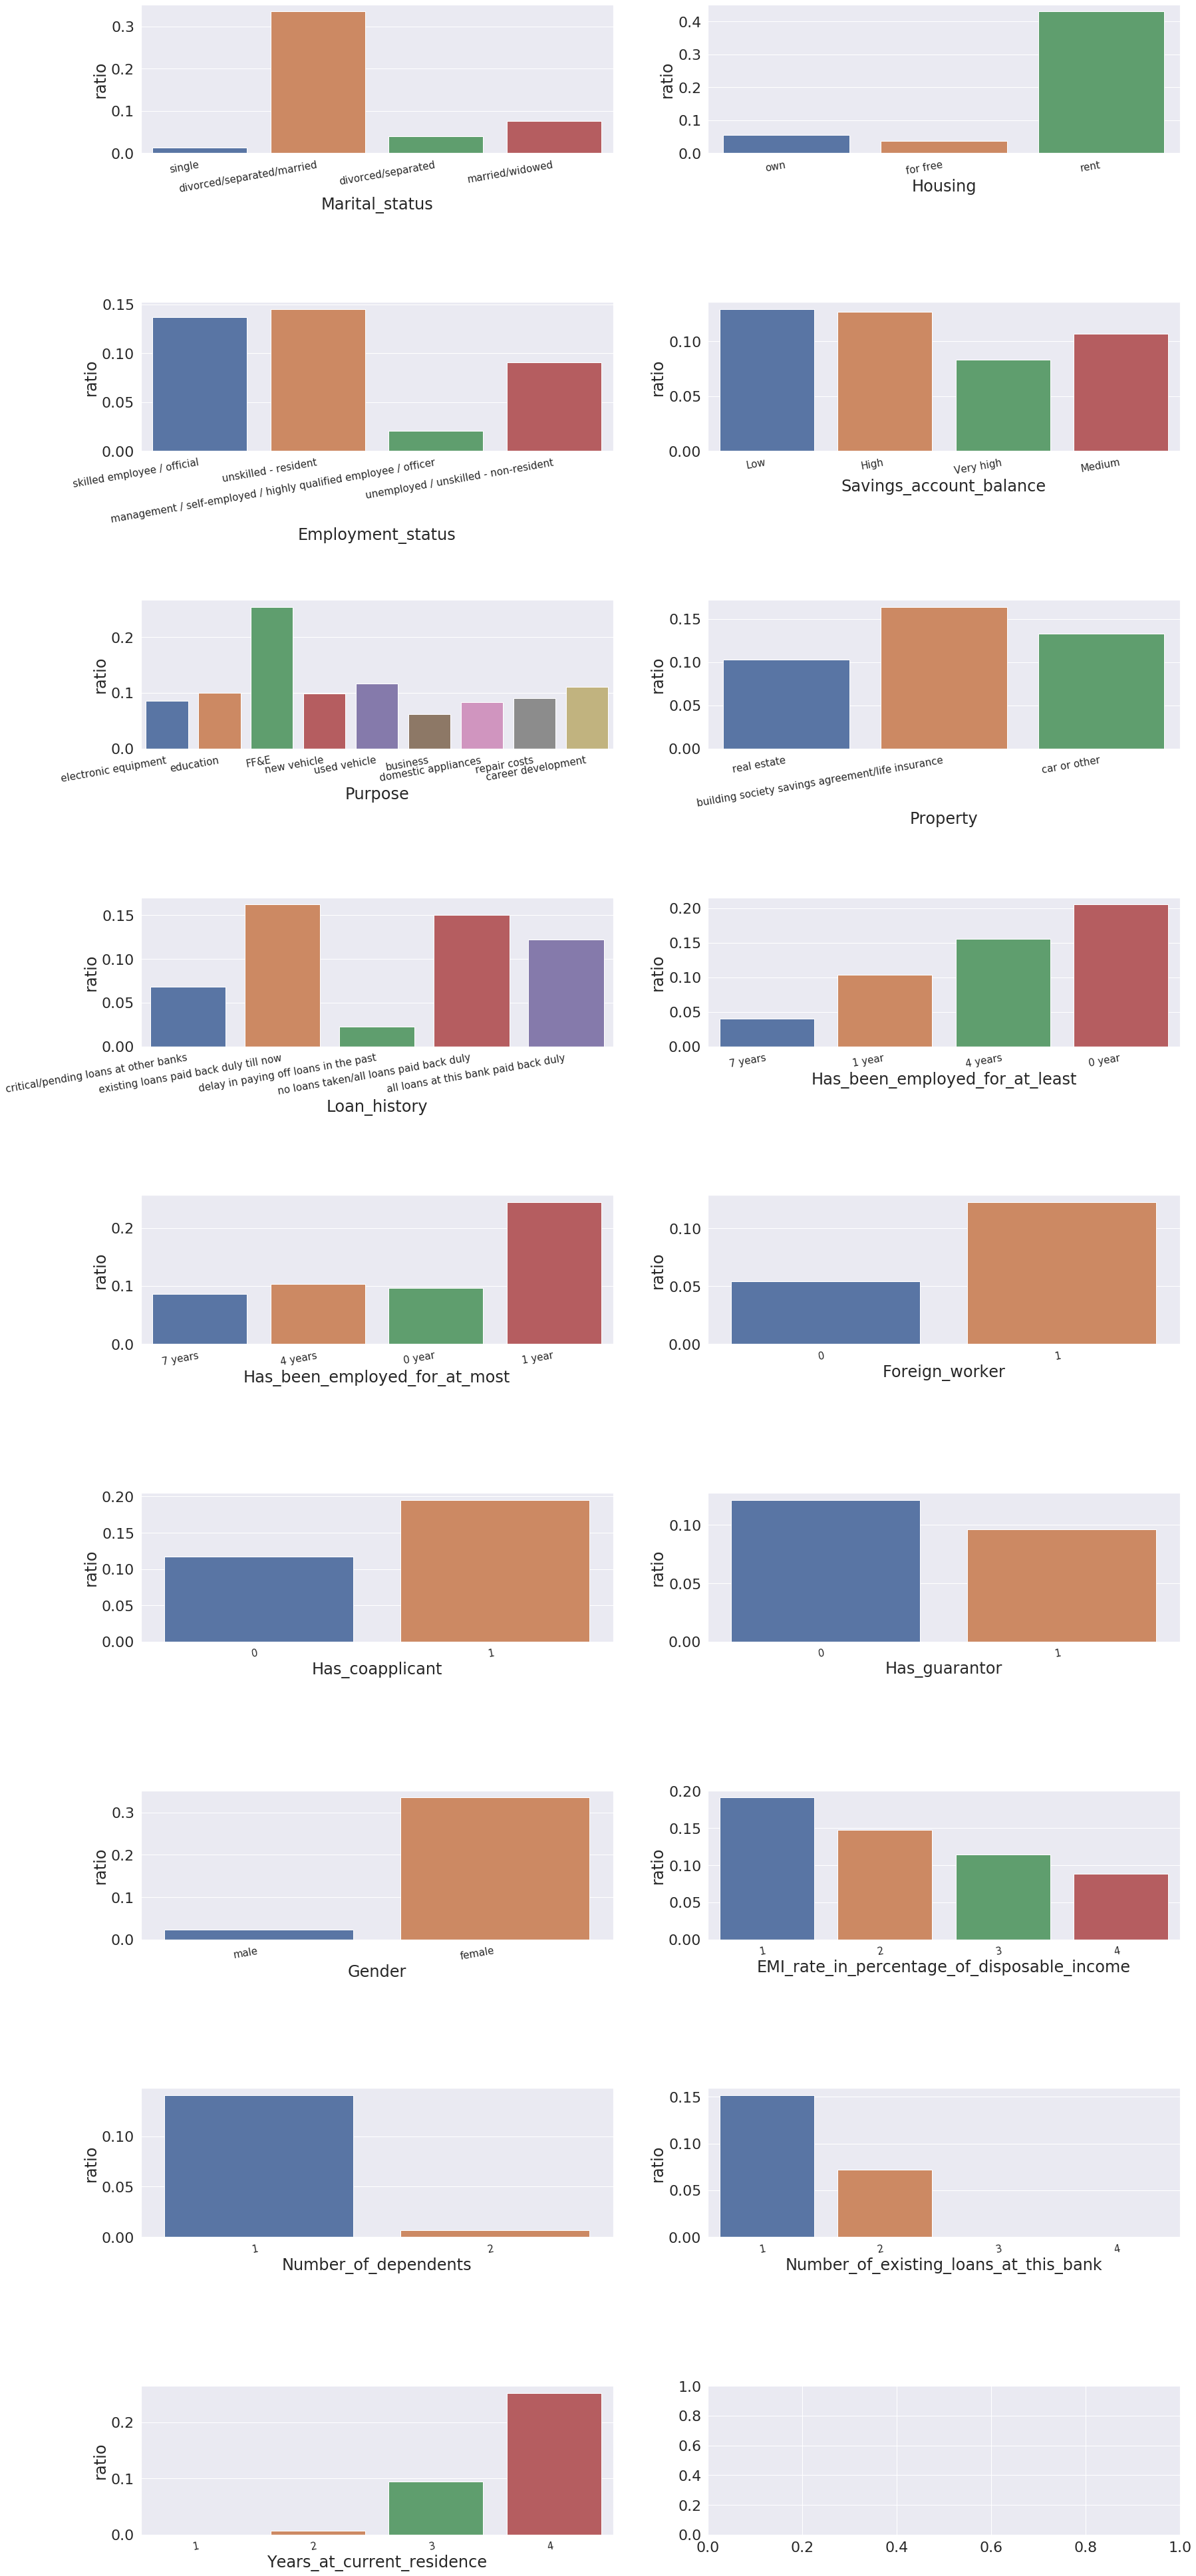

In [84]:
ratio_plotter(applicant_loan_v1.loc[cluster_indexing[5],:], features, cluster = True)

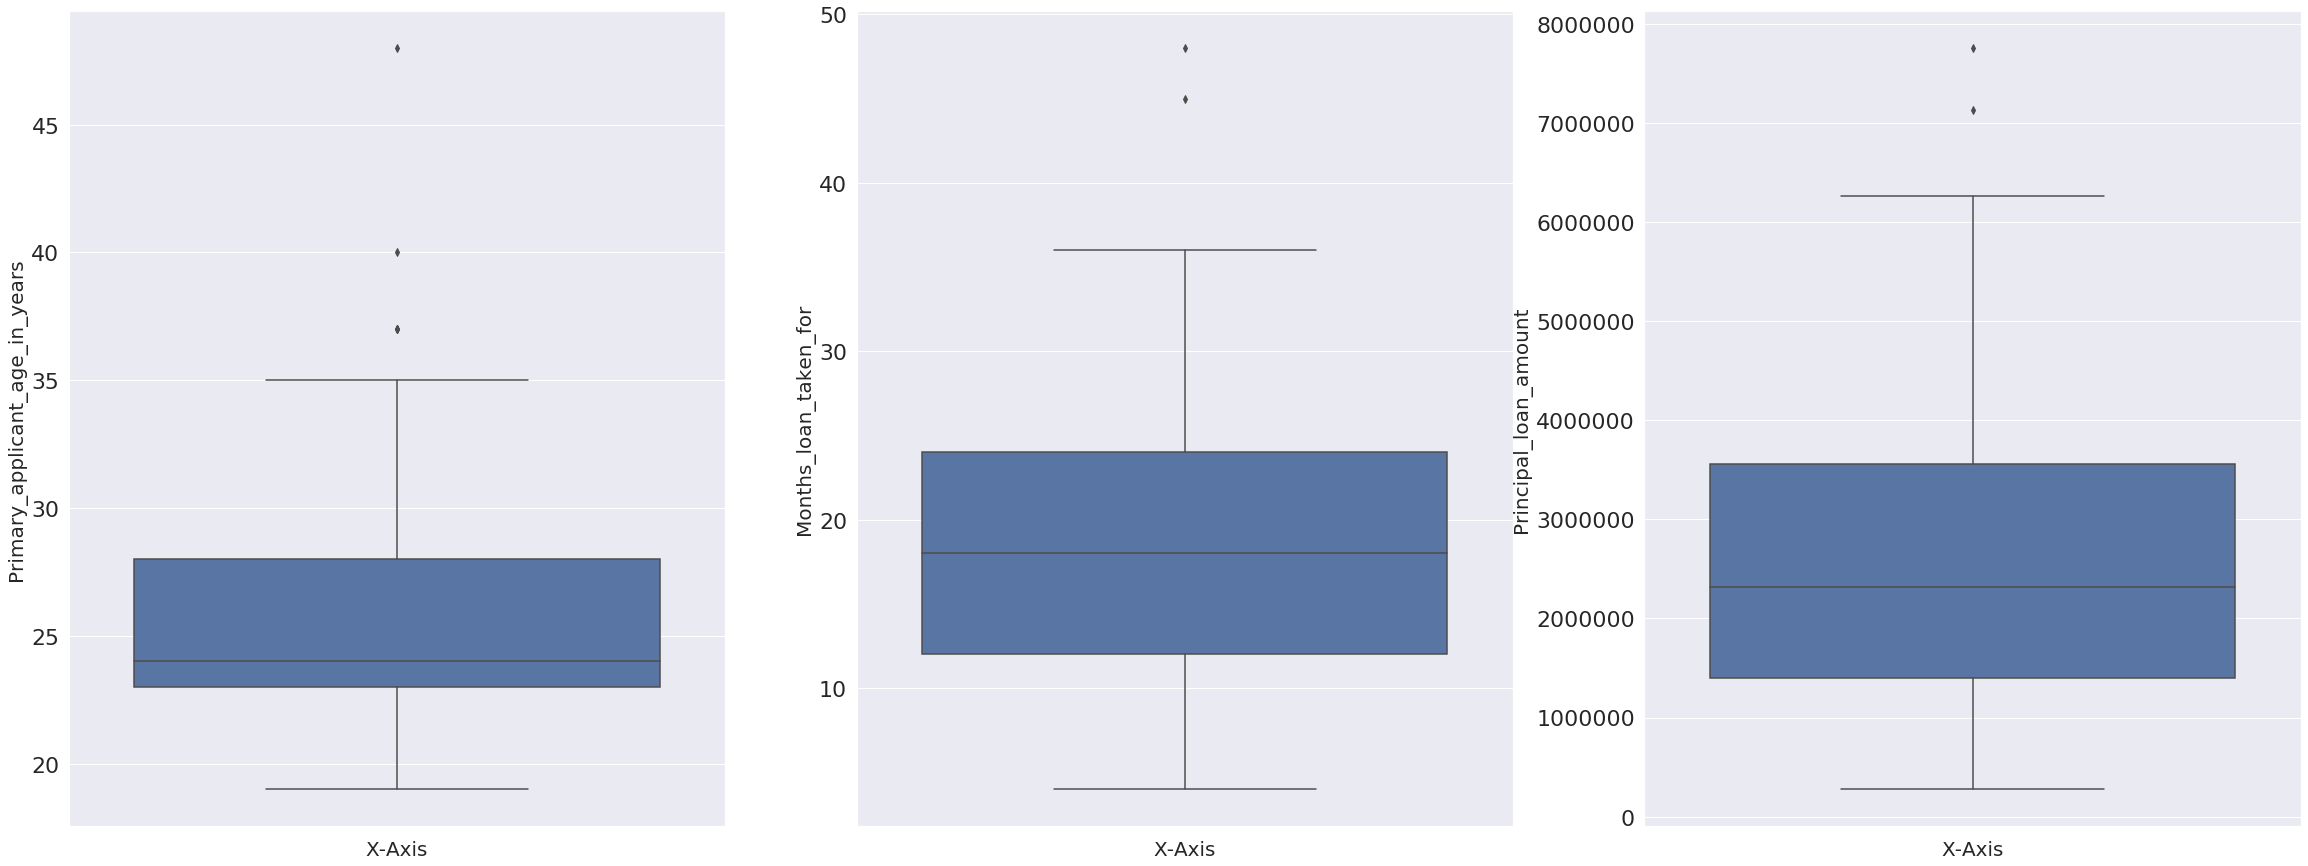

In [77]:
boxplotter(applicant_loan_v1.loc[cluster_indexing[5],:],xaxis=False)

['Marital_status', 'Housing', 'Employment_status', 'Savings_account_balance', 'Purpose', 'Property', 'Loan_history', 'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most', 'Foreign_worker', 'Has_coapplicant', 'Has_guarantor', 'Gender']


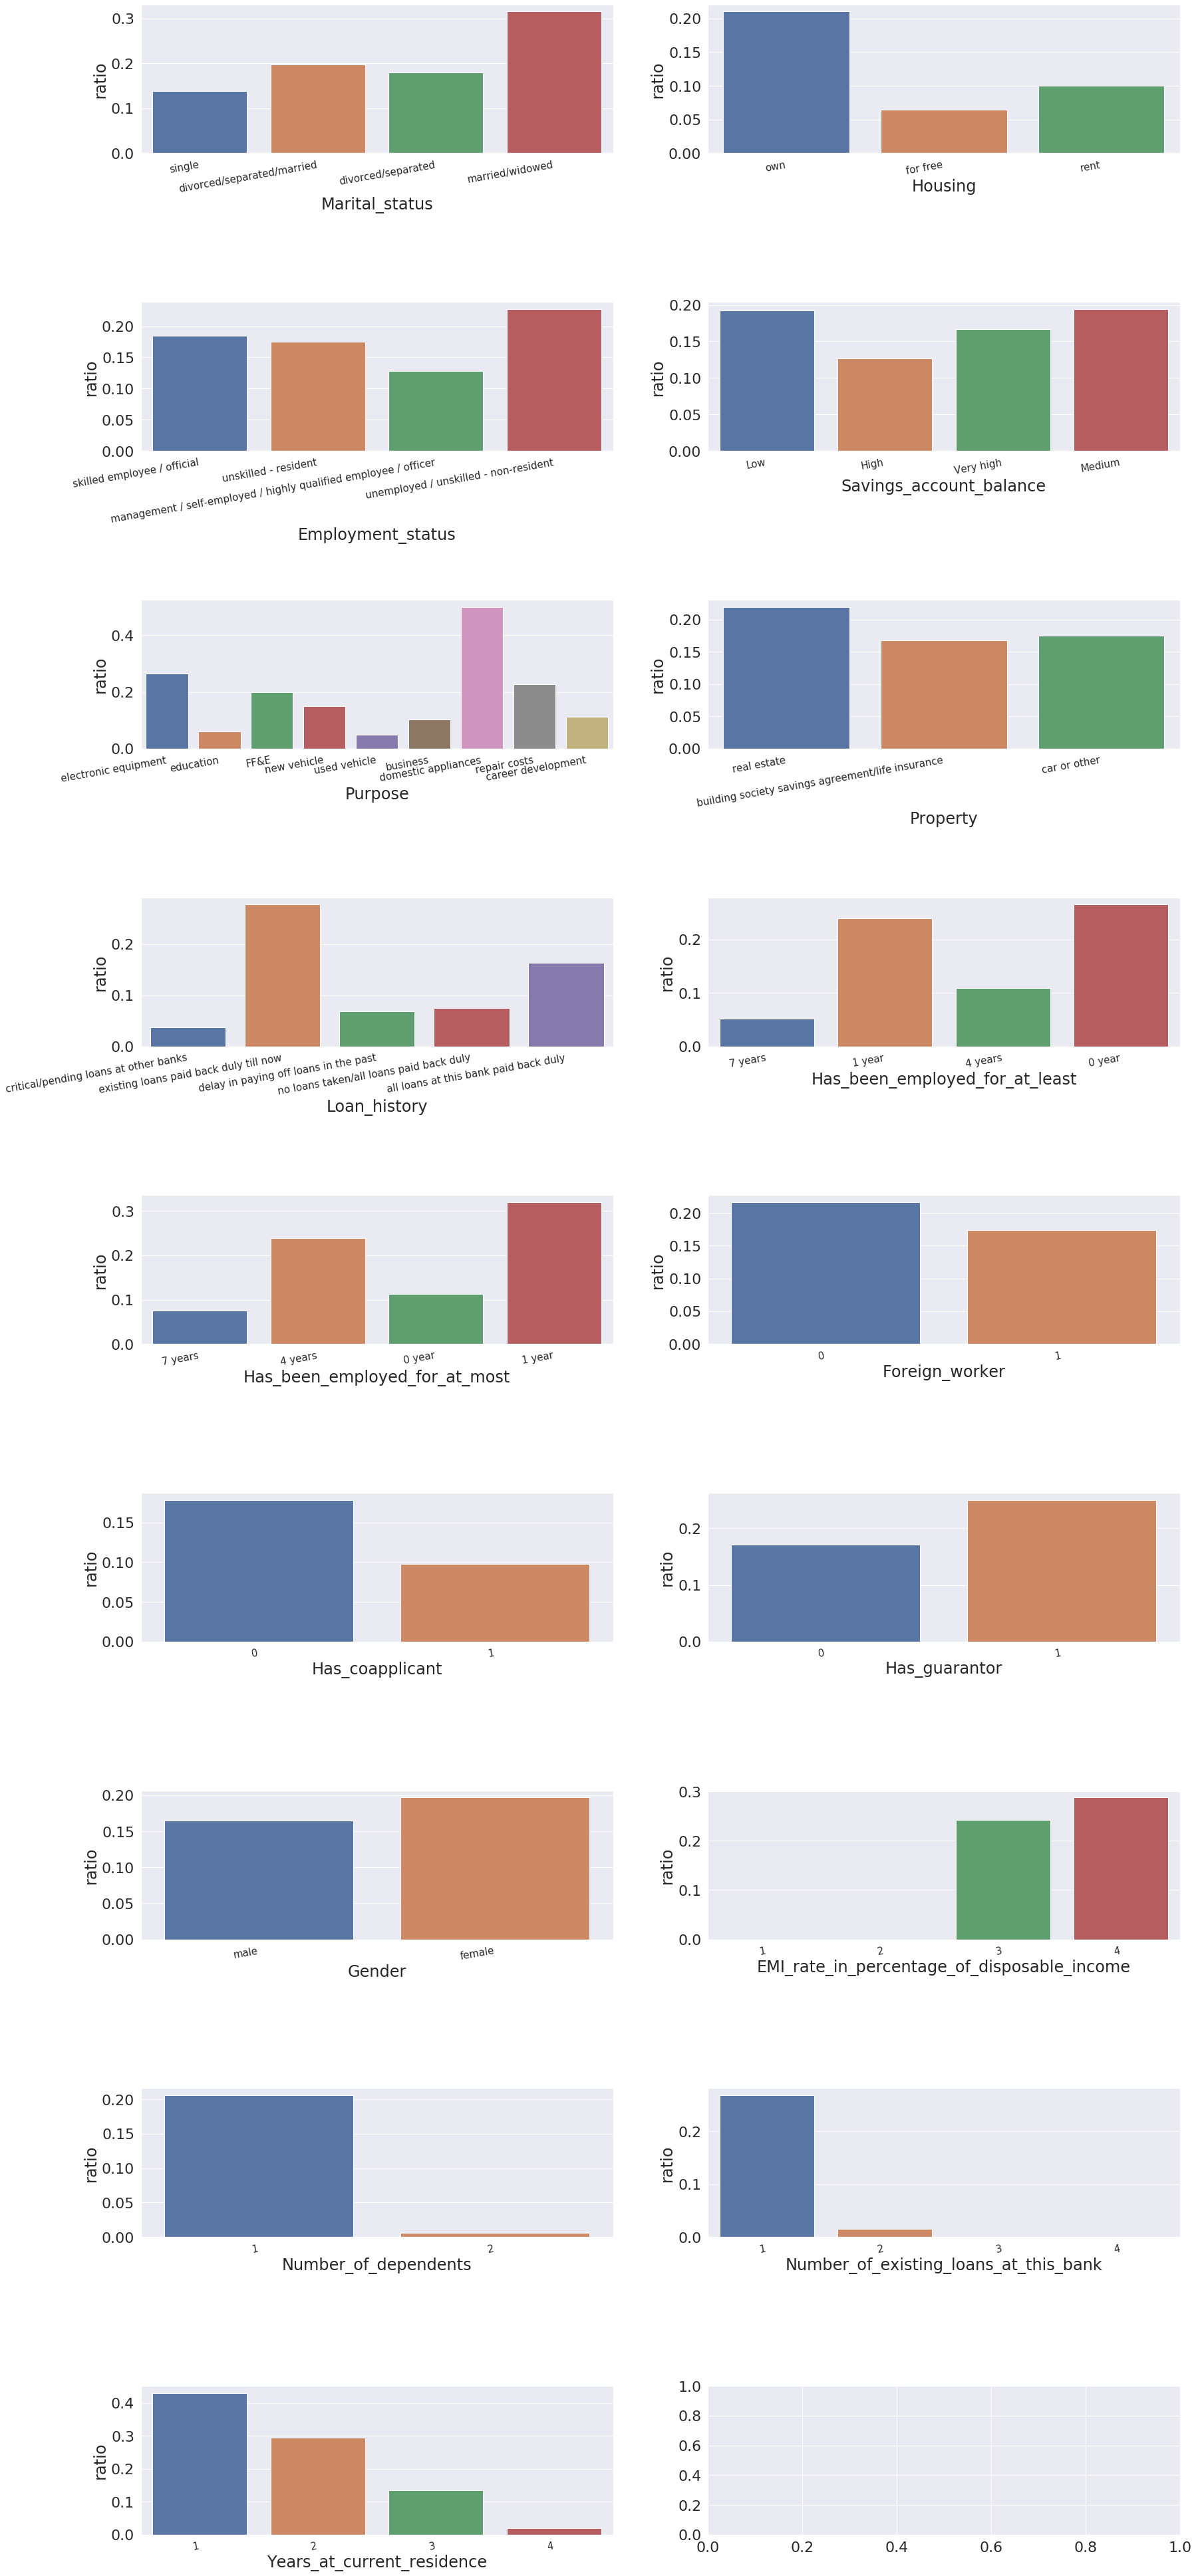

In [85]:
ratio_plotter(applicant_loan_v1.loc[cluster_indexing[6],:], features, cluster = True)

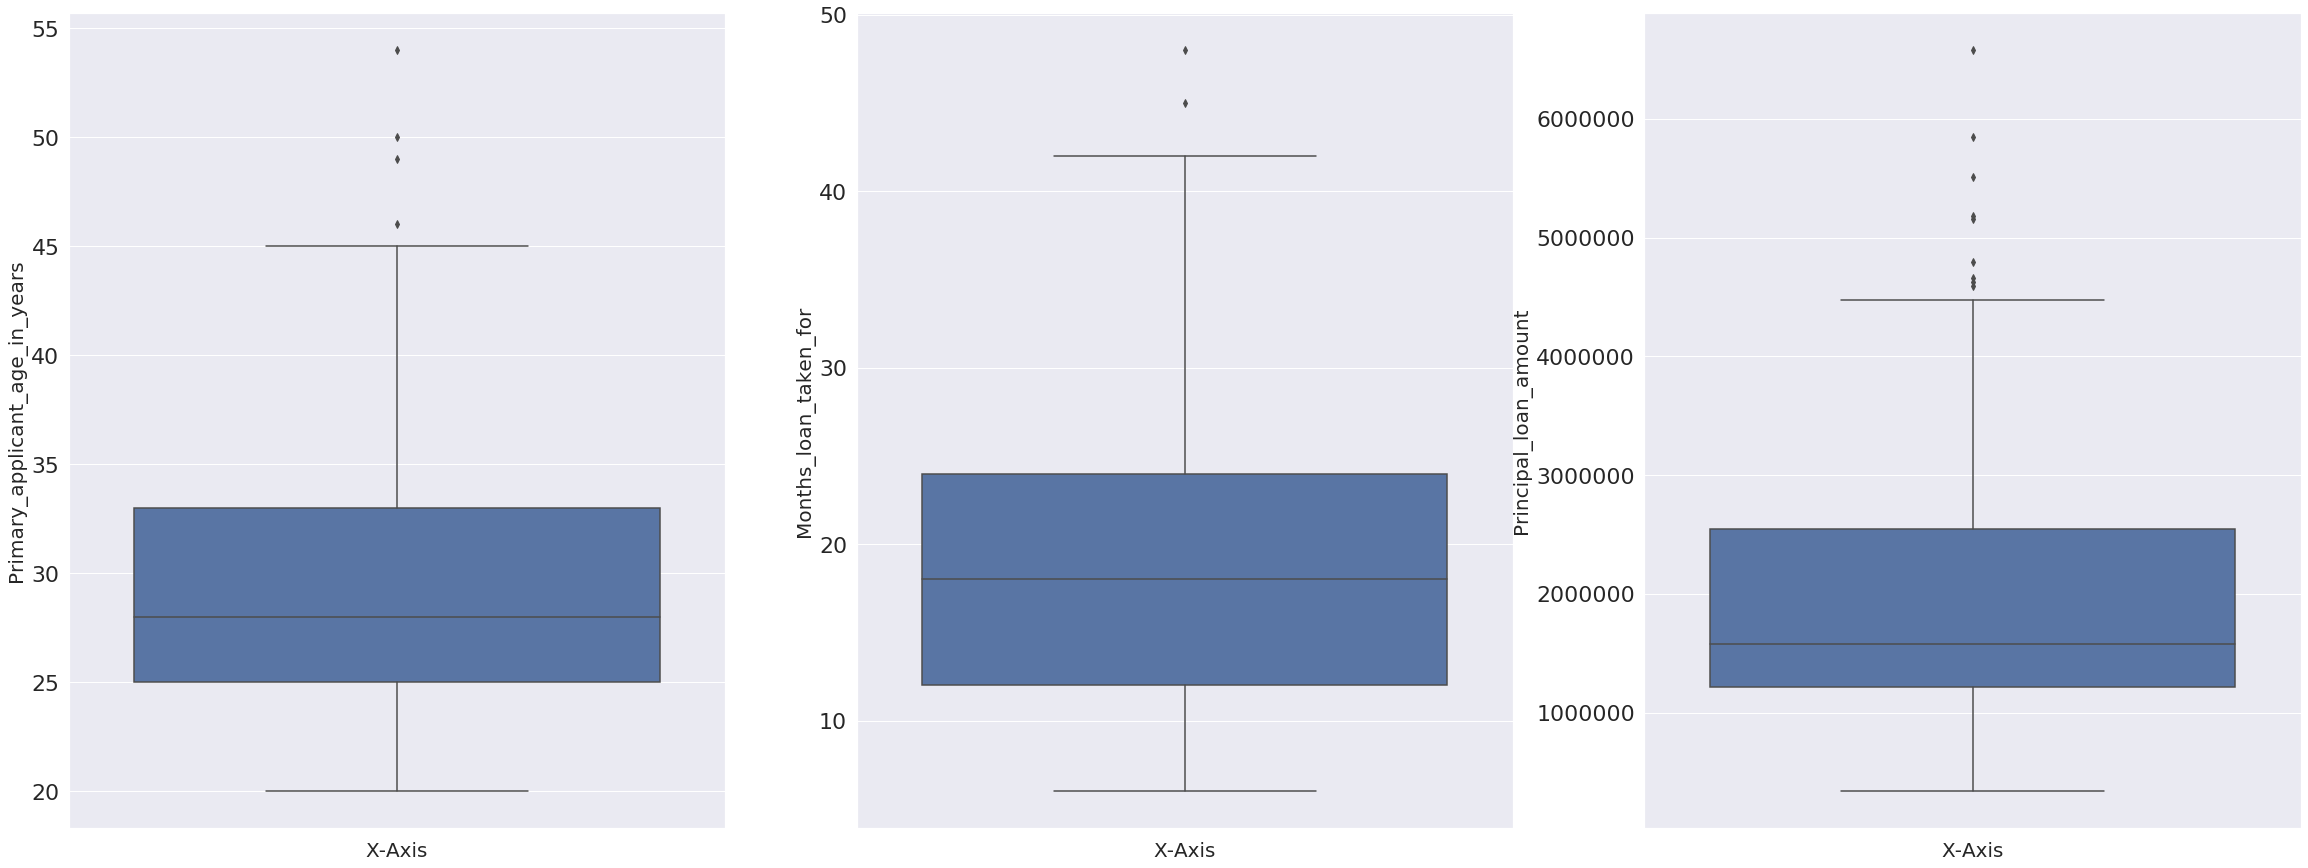

In [79]:
boxplotter(applicant_loan_v1.loc[cluster_indexing[6],:],xaxis=False)

# Observations
<a id='verdict'></a>
The comparison of the bar plots for the cluster with the bar plots of the overall dataset can be interpreted as follows, i have done it for one cluster which is 'cluster 0' but it can be similarly done for each of the 7 clusters.

- Primary_applicant_age : 25 - 32 : + | although this is an important feature the applicants age who are high risk and low arisk are pretty overlapping, so we cant say much solely on the basis of this cluster so we need to look at other clusters as well.
- Monthly loan taken for : 12 - 22 months = + | In the [ratio plots](#graph_explain) discussed above the appropriate time should be between 12 - 22 months.
- Principal loan amount : 1.1 - 2.7 million = + | The appropriate loan amount should be between 1.5 - 4 million.
- marital_status : divorced/seperated = -
- Housing : own = +
- Employment_status : Skilled employee/ official = + |  its ambiguos may be that is why in pca this feature is given less weight.
- saving_account_balance : high and very high = + |  this feature does not matter that much as its weight in pca is very less, it does not even occour in the first 3 principal components.
- Purpose : electronic equipment = +  | number of people asking for risky loans like education, repair cost are even less then cluster 0
- Property : real estate = +  
- Loan_history : existing loans paid back duly till now = + 
- Has_been_employed_for_at_least : 1 year and 0 years = - |this is an important feature
- Has_been_employed_for_at_most : 4 years and 1 year - | 4 years is still fine but 1 year is definetly risky
- Gender : male = + | although i have given a plus here but the ratio for both male and female being less risky is pretty similar.
- EMI_rate_in_percentage_of_disposable_income : 4 : - | it is an important feature
- years at current_residence : 2  = - | important feature but 
- Numer of existing loans at this bank : 1  : - | important feature and the appropriate value should be 3 or 2

So based on the above observation there are 10 supporting and 6 opposing evidences



By doing similar comparison for all the clusters we can say that cluster 1, 3 and 6 can be approved for loan!